### Comparison between Ours vs Chen-AL

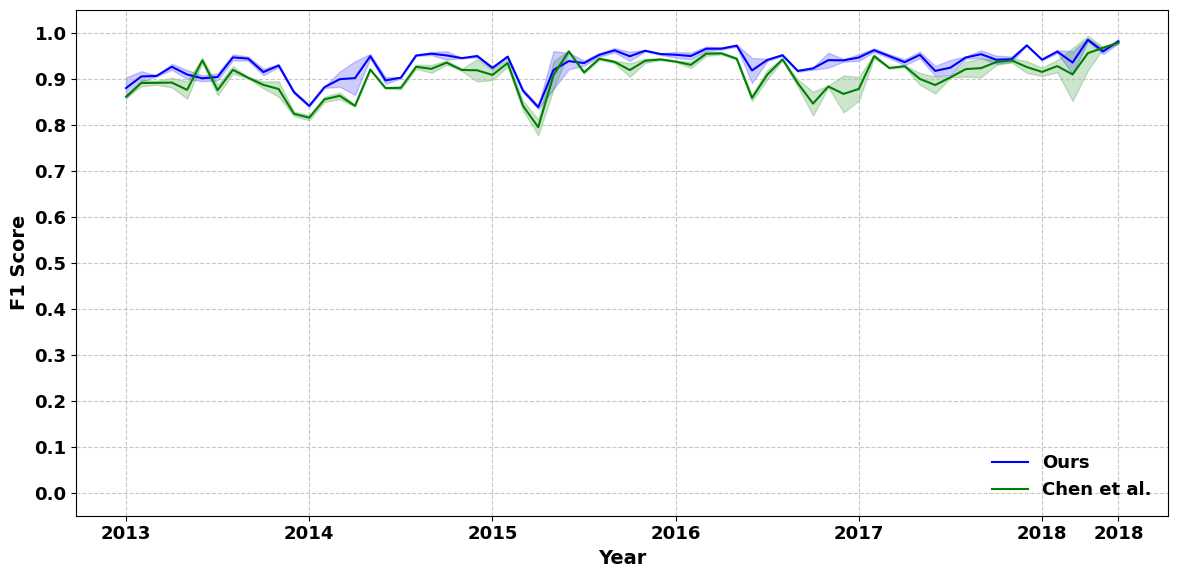

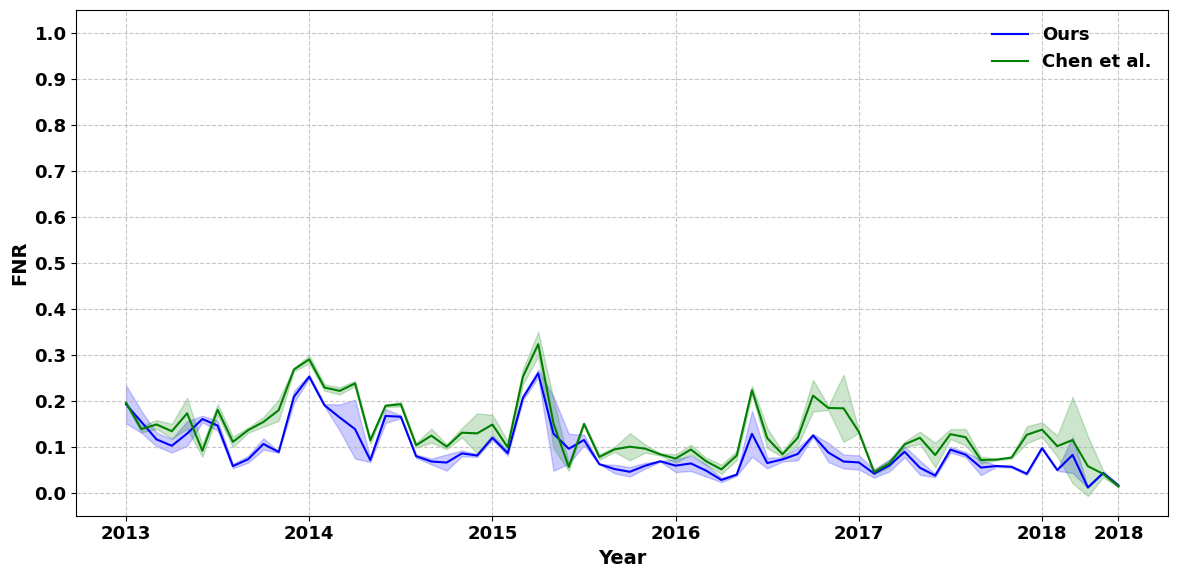

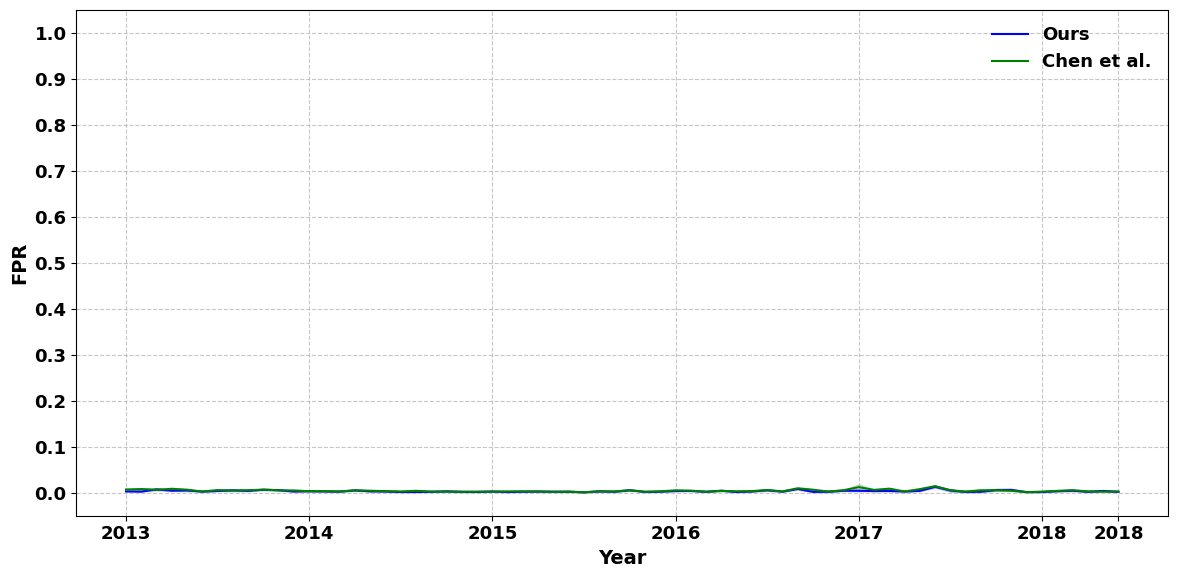

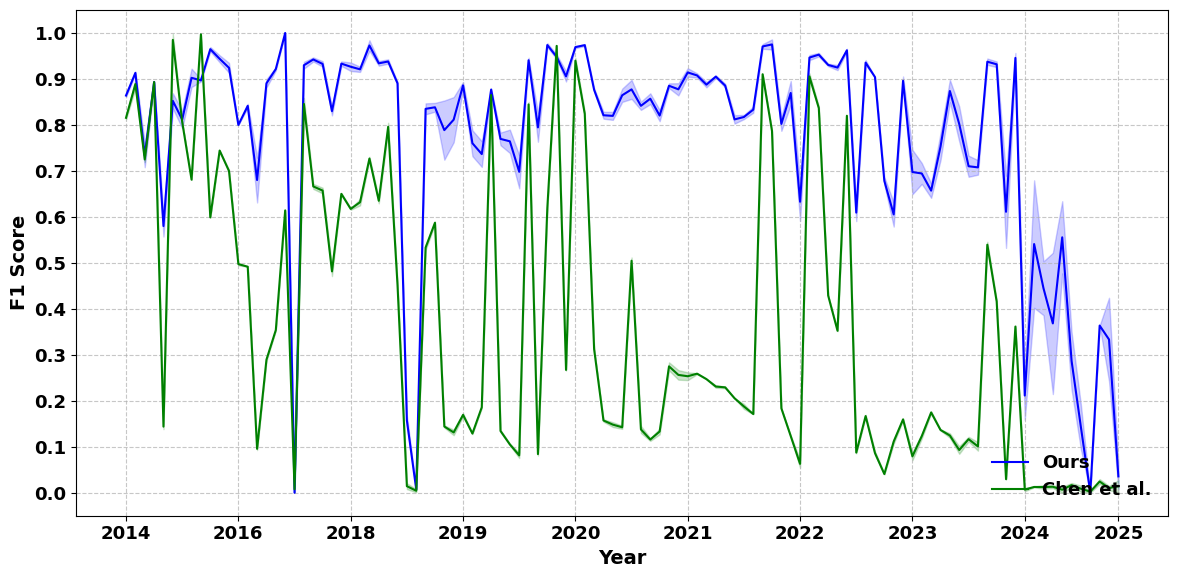

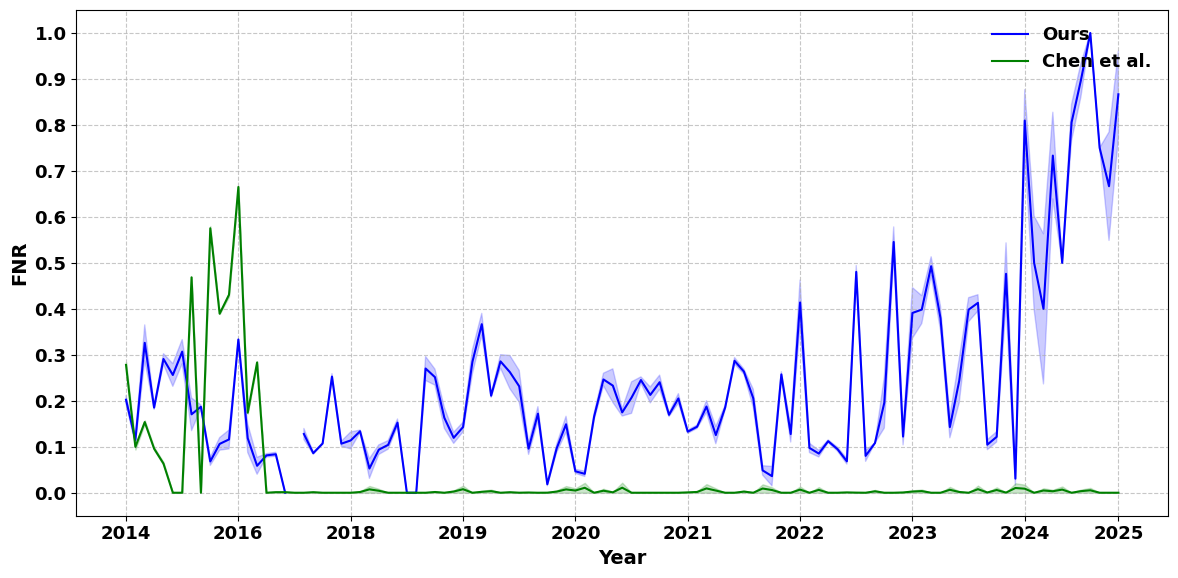

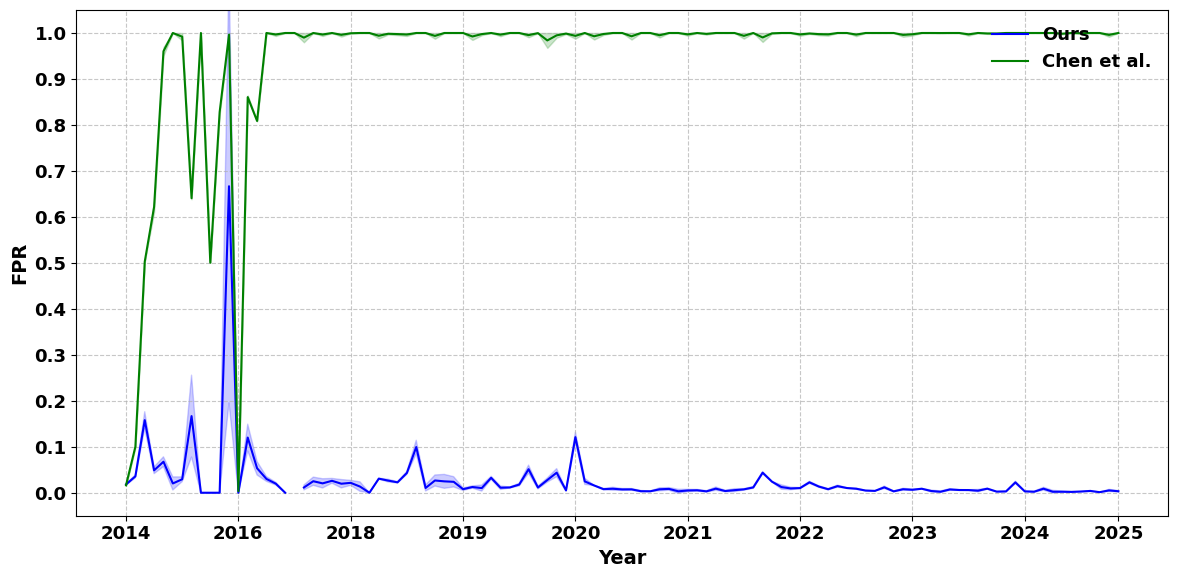

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

# Global font settings
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})


# def plot_metric_comparison(months, ours_mean, ours_std, chen_mean, chen_std, metric_name, ylabel, save_path):
#     plt.figure(figsize=(12, 6))
#     plt.plot(months, ours_mean, label="Ours", color="blue")
#     plt.fill_between(months, ours_mean - ours_std, ours_mean + ours_std, color="blue", alpha=0.2)

#     plt.plot(months, chen_mean, label="Chen et al.", color="green")
#     plt.fill_between(months, chen_mean - chen_std, chen_mean + chen_std, color="green", alpha=0.2)

#     plt.ylabel(ylabel)
#     plt.xlabel("Year")

#     plt.ylim(0, 1)
#     plt.grid(True, linestyle='--', alpha=0.7)
#     plt.legend(loc="upper right")

#     # Extract only years and use one tick per year
#     year_ticks = []
#     year_labels = []
#     seen_years = set()

#     for i, m in enumerate(months):
#         year = m.split('-')[0]
#         if year not in seen_years:
#             year_ticks.append(i)
#             year_labels.append(year)
#             seen_years.add(year)

#     plt.xticks(ticks=year_ticks, labels=year_labels, rotation=0)
#     plt.tight_layout()
#     plt.savefig(save_path, dpi=300)
#     plt.show()

# def plot_metric_comparison(months, ours_mean, ours_std, chen_mean, chen_std, metric_name, ylabel, save_path,legend_loc="lower right"):
#     plt.figure(figsize=(12, 6))
#     plt.plot(months, ours_mean, label="Ours", color="blue")
#     plt.fill_between(months, ours_mean - ours_std, ours_mean + ours_std, color="blue", alpha=0.2)

#     plt.plot(months, chen_mean, label="Chen et al.", color="green")
#     plt.fill_between(months, chen_mean - chen_std, chen_mean + chen_std, color="green", alpha=0.2)

#     plt.ylabel(ylabel)
#     plt.xlabel("Month")
    
#     plt.xticks(rotation=45)
#     # plt.ylim(0, 1)
#     plt.yticks(np.arange(-0.1, 1.11, 0.1))  # extends slightly beyond [0,1]
#     plt.ylim(-0.05, 1.05)
#     plt.grid(True, linestyle='--', alpha=0.7)
#     if metric_name == "F1 Score":
#         plt.legend(loc=legend_loc)
#     else:
#         plt.legend(loc="upper right")
#     plt.tight_layout()
#     plt.savefig(save_path, dpi=300)
#     plt.show()



# def plot_metric_comparison(months, ours_mean, ours_std, chen_mean, chen_std, metric_name, ylabel, save_path, legend_loc):
#     plt.figure(figsize=(12, 6))
#     plt.plot(months, ours_mean, label="Ours", color="blue")
#     plt.fill_between(months, ours_mean - ours_std, ours_mean + ours_std, color="blue", alpha=0.2)

#     plt.plot(months, chen_mean, label="Chen et al.", color="green")
#     plt.fill_between(months, chen_mean - chen_std, chen_mean + chen_std, color="green", alpha=0.2)

#     plt.ylabel(ylabel)
#     plt.xlabel("Year")

#     plt.yticks(np.arange(-0.1, 1.11, 0.1))
#     plt.ylim(-0.05, 1.05)
#     plt.grid(True, linestyle='--', alpha=0.7)
#     if metric_name == "F1 Score":
#         plt.legend(loc=legend_loc)
#     else:
#         plt.legend(loc="upper right")

#     # Dynamically select non-overlapping year ticks (≥12 indices apart)
#     year_ticks = []
#     year_labels = []
#     seen_years = set()
#     last_tick_index = -100

#     for i, m in enumerate(months):
#         year = m.split('-')[0]
#         if (i - last_tick_index >= 12 and year not in seen_years) or i == 0 or i == len(months) - 1:
#             year_ticks.append(i)
#             year_labels.append(year)
#             last_tick_index = i
#             seen_years.add(year)

#     plt.xticks(ticks=year_ticks, labels=year_labels, rotation=0)
#     plt.tight_layout()
#     plt.savefig(save_path, dpi=300)
#     plt.show()

import matplotlib.pyplot as plt
import numpy as np

def plot_metric_comparison(
    months,
    ours_mean,
    ours_std,
    chen_mean,
    chen_std,
    metric_name,
    ylabel,
    save_path,
    legend_loc="upper right"
):
    plt.figure(figsize=(12, 6))

    # Plot mean and std for "Ours"
    plt.plot(months, ours_mean, label="Ours", color="blue")
    plt.fill_between(
        months,
        ours_mean - ours_std,
        ours_mean + ours_std,
        color="blue",
        alpha=0.2
    )

    # Plot mean and std for "Chen et al."
    plt.plot(months, chen_mean, label="Chen et al.", color="green")
    plt.fill_between(
        months,
        chen_mean - chen_std,
        chen_mean + chen_std,
        color="green",
        alpha=0.2
    )

    # Axes labels and title
    plt.ylabel(ylabel)
    plt.xlabel("Year")
    plt.title(f"{metric_name} Comparison Over Time")

    # Y-axis formatting
    plt.yticks(np.arange(-0.1, 1.11, 0.1))
    plt.ylim(-0.05, 1.05)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Legend positioning
    if metric_name == "F1 Score":
        plt.legend(loc=legend_loc)
    else:
        plt.legend(loc="upper right")

    # Create clean year-based x-ticks (ensure each year is labeled once)
    year_ticks = []
    year_labels = []
    seen_years = set()

    for i, m in enumerate(months):
        year = m.split('-')[0]
        if year not in seen_years or i == 0 or i == len(months) - 1:
            year_ticks.append(i)
            year_labels.append(year)
            seen_years.add(year)

    plt.xticks(ticks=year_ticks, labels=year_labels, rotation=0)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.show()




def run_comparison_plot(ours_pattern, chen_pattern, dataset="apigraph"):
    # Expand wildcards using glob
    ours_files = glob.glob(ours_pattern)
    chen_files = glob.glob(chen_pattern)

    if not ours_files or not chen_files:
        raise FileNotFoundError("No matching CSV files found for the given patterns.")

    # Load and concatenate all CSVs
    df_ours = pd.concat([pd.read_csv(f) for f in ours_files], ignore_index=True)
    df_chen = pd.concat([pd.read_csv(f, delimiter='\t') for f in chen_files], ignore_index=True)

    # Ensure 'month' column is string and sorted
    df_ours['year'] = df_ours['year'].astype(str)
    df_chen['date'] = df_chen['date'].astype(str)

    df_ours = df_ours.sort_values(by='year')
    df_chen = df_chen.sort_values(by='date')

    # Group and aggregate
    ours_grouped = df_ours.groupby('year')
    chen_grouped = df_chen.groupby('date')

    # Use union of all months
    all_months = sorted(set(ours_grouped.groups.keys()).union(chen_grouped.groups.keys()))

    def extract_metric(group, metric, months):
        mean = []
        std = []
        for m in months:
            values = group.get_group(m)[metric] if m in group.groups else pd.Series([np.nan])
            mean.append(values.mean())
            std.append(values.std(ddof=0) if len(values) > 1 else 0)
        return np.array(mean), np.array(std)

    # Extract for each metric
    ours_f1_mean, ours_f1_std = extract_metric(ours_grouped, "f1", all_months)
    ours_fnr_mean, ours_fnr_std = extract_metric(ours_grouped, "fnr", all_months)
    ours_fpr_mean, ours_fpr_std = extract_metric(ours_grouped, "fpr", all_months)

    chen_f1_mean, chen_f1_std = extract_metric(chen_grouped, "F1", all_months)
    chen_fnr_mean, chen_fnr_std = extract_metric(chen_grouped, "FNR", all_months)
    chen_fpr_mean, chen_fpr_std = extract_metric(chen_grouped, "FPR", all_months)

    # Plot
    plot_metric_comparison(all_months, ours_f1_mean, ours_f1_std, chen_f1_mean, chen_f1_std,
                           "F1 Score", "F1 Score", f"{dataset}_f1_comparison.png", legend_loc="lower right")
    plot_metric_comparison(all_months, ours_fnr_mean, ours_fnr_std, chen_fnr_mean, chen_fnr_std,
                           "False Negative Rate (FNR)", "FNR", f"{dataset}_fnr_comparison.png", legend_loc="upper right")
    plot_metric_comparison(all_months, ours_fpr_mean, ours_fpr_std, chen_fpr_mean, chen_fpr_std,
                           "False Positive Rate (FPR)", "FPR", f"{dataset}_fpr_comparison.png", legend_loc="upper right")

# Example usage with glob patterns
# Comparison Ours vs Chen-AL on 400 budget

# chen_pattern = "/home/mhaque3/myDir/active-learning/chen_al_andro_400_2020_7/gen_apigraph_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt400_*_scores.csv"
# ours_pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/al_androzoo/fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_*_final_400_lp_2.0_unc_samp_boundary_E250_ALE50_active.csv"
# run_comparison_plot(ours_pattern, chen_pattern, dataset="androzoo")


ours_pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/al_apigraph/fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_*_final_400_lp_2.0_unc_samp_boundary_active.csv"
chen_pattern = "/home/mhaque3/myDir/active-learning/chen_al_api_100_7/gen_apigraph_cnt100_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-07_2018-12_cnt100_*_scores.csv"
run_comparison_plot(ours_pattern, chen_pattern, dataset="apigraph")

chen_pattern = "/home/shared-datasets/Feature_extraction/active-learning/chen_al_LAMDA_400_7/LAMDA_TEST_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2014-07_2025-01_cnt400_*_scores.csv"
ours_pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/al_LAMDA/fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_*_final_400_lp_2.0_unc_samp_boundary_active.csv"
run_comparison_plot(ours_pattern, chen_pattern, dataset="lamda")



## F1 score and FNR plot function

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import os
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, average_precision_score
)

# Global font settings
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

def plot_f1_fnr(years, f1s, fnrs, save_path="f1_fnr_fixmatch_baseline_with_al.png"):
    # Convert to list if Series
    years = list(years)
    f1s = list(f1s)
    fnrs = list(fnrs)

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.set_xlabel("Year")
    # ax1.set_ylabel("F1 Score", color="blue")
    ax1.plot(years, f1s, color="blue", label="F1 Score")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1)
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    ax2 = ax1.twinx()
    # ax2.set_ylabel("False Negative Rate (FNR)", color="red")
    ax2.plot(years, fnrs, color="red", label="FNR")
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.set_ylim(0, 1)

    # Set only year (4-digit) on x-axis, sampled to reduce overlap
    xtick_positions = []
    xtick_labels = []
    seen_years = set()
    for idx, ym in enumerate(years):
        year = ym.split("-")[0]
        if year not in seen_years:
            xtick_positions.append(idx)
            xtick_labels.append(year)
            seen_years.add(year)

    ax1.set_xticks(xtick_positions)
    ax1.set_xticklabels(xtick_labels, rotation=0)

    # Add legend above plot to avoid overlapping x-label
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path, dpi=300)
    plt.show()


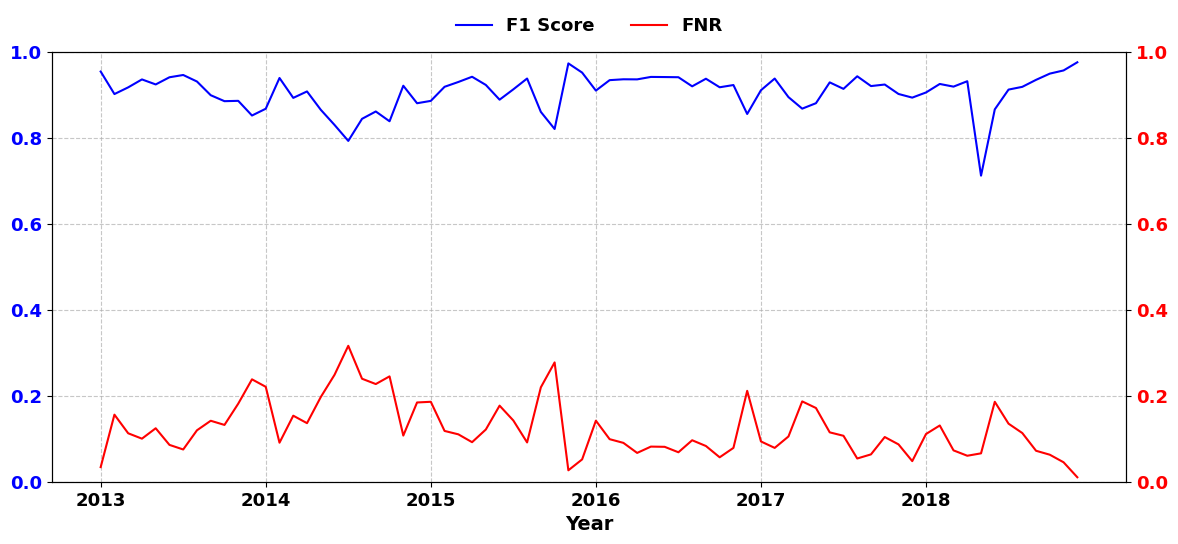

Mean F1: 0.9078, Mean FNR: 0.1240, Mean FPR: 0.0056


In [30]:
df = pd.read_csv("/home/mhaque3/myDir/active-learning/results_ours/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt200.csv", delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]

strategy = "Chen-AL_framework"
plot_f1_fnr(years, f1s, fnrs, save_path=f"results/{strategy}_f1_fnr.png")
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {df['FPR'].mean():.4f}")

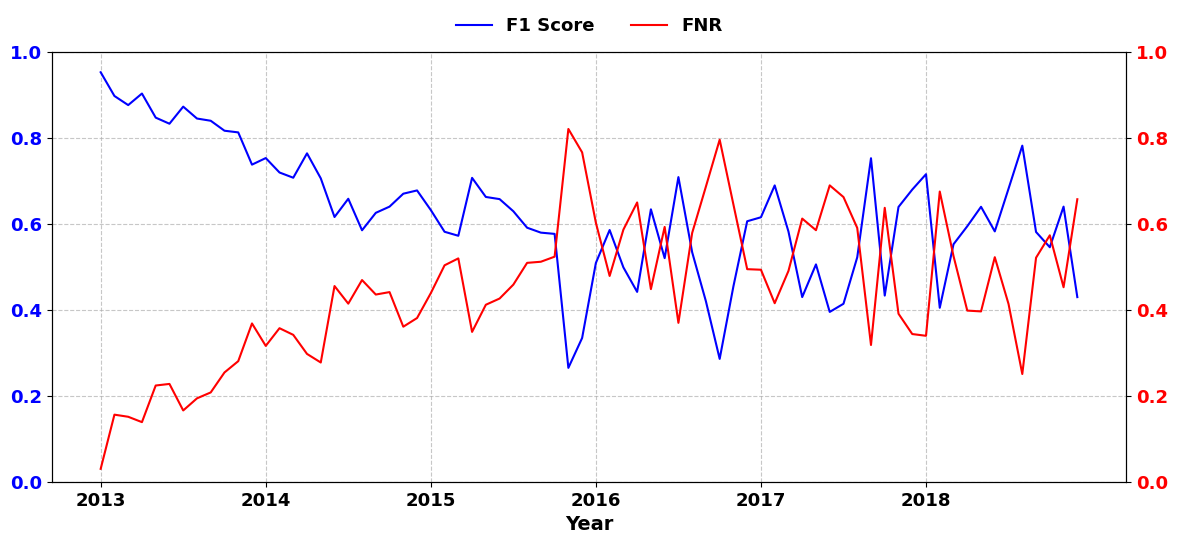

Mean F1: 0.6278, Mean FNR: 0.4459, Mean FPR: 0.0189


In [29]:
df = pd.read_csv("/home/mhaque3/myDir/active-learning/results_chen_AL_baseline/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt200.csv", delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]

strategy = "Chen-AL_baseline"
plot_f1_fnr(years, f1s, fnrs, save_path=f"results/{strategy}_f1_fnr.png")
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {df['FPR'].mean():.4f}")

## FixMatch baseline (bit flip and reduced learning rate)

In [5]:
import matplotlib.pyplot as plt

# Global font settings
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

def plot_f1_fnr(years, f1s, fnrs, save_path="f1_fnr_fixmatch_baseline_with_al.png"):
    # Convert to list if Series
    years = list(years)
    f1s = list(f1s)
    fnrs = list(fnrs)

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.set_xlabel("Year")
    ax1.set_ylabel("F1 Score", color="blue")
    ax1.plot(years, f1s, color="blue", label="F1 Score")
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1)
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.set_ylabel("False Negative Rate (FNR)", color="red")
    ax2.plot(years, fnrs, color="red", label="FNR")
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.set_ylim(0, 1)

    # Set only year (4-digit) on x-axis, sampled to reduce overlap
    xtick_positions = []
    xtick_labels = []
    seen_years = set()
    for idx, ym in enumerate(years):
        year = ym.split("_")[0]
        if year not in seen_years:
            xtick_positions.append(idx)
            xtick_labels.append(year)
            seen_years.add(year)

    ax1.set_xticks(xtick_positions)
    ax1.set_xticklabels(xtick_labels, rotation=0)

    # Add legend above plot to avoid overlapping x-label
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path, dpi=300)
    plt.show()



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
import os
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, average_precision_score
)



strategy = "fixmatch_bit_flip_wo_al_bit_flip_1-4"

# === Classifier Definition ===
class Classifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.out = nn.Linear(256, num_classes)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

# === Data Split Function ===
def split_labeled_unlabeled(X, y, labeled_ratio=0.1, stratify=True, random_state=42):
    n_samples = len(X)
    n_labeled = int(n_samples * labeled_ratio)
    if stratify:
        X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
            X, y, train_size=n_labeled, stratify=y, random_state=random_state
        )
    else:
        X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
            X, y, train_size=n_labeled, random_state=random_state
        )
    return X_labeled, y_labeled, X_unlabeled, y_unlabeled

# === FixMatch + Drift-Aware Evaluation ===
def random_bit_flip(x, n_bits=1):
    """
    Randomly flip n_bits in each sample of the batch.
    Args:
        x: Tensor of shape (batch_size, num_features)
        n_bits: Number of bits (features) to flip per sample
    Returns:
        Augmented tensor with bits flipped
    """
    x_aug = x.clone()
    batch_size, num_features = x.shape
    for i in range(batch_size):
        flip_indices = torch.randperm(num_features)[:n_bits]
        x_aug[i, flip_indices] = 1 - x_aug[i, flip_indices]
    return x_aug

def train_fixmatch_drift_eval(model, optimizer, X_labeled, y_labeled, X_unlabeled, test_sets_by_year, num_classes=2, threshold=0.95, lambda_u=1.0, epochs=150, batch_size=64):
    labeled_ds = TensorDataset(X_labeled, y_labeled)
    unlabeled_ds = TensorDataset(X_unlabeled)

    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)


    labeled_loader = DataLoader(labeled_ds, batch_size=batch_size, shuffle=True)
    unlabeled_loader = DataLoader(unlabeled_ds, batch_size=batch_size, shuffle=True)

    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        labeled_iter = iter(labeled_loader)
        unlabeled_iter = iter(unlabeled_loader)

        for _ in range(len(labeled_loader)):
            try:
                x_l, y_l = next(labeled_iter)
                (x_u,) = next(unlabeled_iter)
            except StopIteration:
                break

            x_l, y_l = x_l.cuda(), y_l.cuda()
            x_u = x_u.cuda()

            # Apply random bit flip: weak (1 bit), strong (3 bits)
            x_u_w = random_bit_flip(x_u, n_bits=1)
            x_u_s = random_bit_flip(x_u, n_bits=4)

            logits_x = model(x_l)
            loss_x = criterion(logits_x, y_l)

            with torch.no_grad():
                pseudo_logits = F.softmax(model(x_u_w), dim=1)
                pseudo_labels = torch.argmax(pseudo_logits, dim=1)
                max_probs, _ = torch.max(pseudo_logits, dim=1)
                mask = max_probs.ge(threshold).float()

            logits_u = model(x_u_s)
            loss_u = (F.cross_entropy(logits_u, pseudo_labels, reduction='none') * mask).mean()
            loss = loss_x + lambda_u * loss_u

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        print(f"Epoch {epoch+1}: loss={total_loss:.4f}")
        scheduler.step()
    # === Evaluate on each year's test set ===

    metrics_list = []
    model.eval()
    misclassified_details = []

    with torch.no_grad():
        for year, (X_test, y_test, y_test_family) in test_sets_by_year.items():
            X_test, y_test = X_test.cuda(), y_test.cuda()
            logits = model(X_test)
            probs = torch.softmax(logits, dim=1) if logits.shape[1] > 1 else torch.sigmoid(logits)
            preds = logits.argmax(dim=1)
            y_true = y_test.cpu().numpy()
            y_pred = preds.cpu().numpy()
            if probs.shape[1] == 2:
                y_score = probs[:, 1].cpu().numpy()
            else:
                y_score = probs.cpu().numpy()  # for multi-class

            acc = accuracy_score(y_true, y_pred)
            prec = precision_score(y_true, y_pred, zero_division=0)
            rec = recall_score(y_true, y_pred, zero_division=0)
            f1 = f1_score(y_true, y_pred, zero_division=0)
            cm = confusion_matrix(y_true, y_pred)
            if cm.shape == (2, 2):
                tn, fp, fn, tp = cm.ravel()
                fnr = fn / (fn + tp) if (fn + tp) > 0 else 0
                fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
            else:
                fnr = fpr = float('nan')

            # ROC-AUC and PR-AUC (binary or multiclass)
            try:
                if probs.shape[1] == 2:
                    roc_auc = roc_auc_score(y_true, y_score)
                    pr_auc = average_precision_score(y_true, y_score)
                else:
                    roc_auc = roc_auc_score(y_true, probs.cpu().numpy(), multi_class='ovr')
                    pr_auc = average_precision_score(y_true, probs.cpu().numpy(), average='weighted')
            except Exception:
                roc_auc = pr_auc = float('nan')

            metrics_list.append({
                'year': year,
                'accuracy': acc,
                'precision': prec,
                'recall': rec,
                'f1': f1,
                'fnr': fnr,
                'fpr': fpr,
                'roc_auc': roc_auc,
                'pr_auc': pr_auc
            })
            mis_idx = np.where(y_true != y_pred)[0]
            for idx in mis_idx:
                misclassified_details.append({
                    "year": year,
                    "index": idx,
                    "true_label": y_true[idx],
                    "pred_label": y_pred[idx],
                    "family": y_test_family[idx] if len(y_test_family) > idx else "unknown",
                    "prob": float(probs[idx].max().cpu().item())
})

            print(f"Year {year}: Acc={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}, F1={f1:.4f}, FNR={fnr:.4f}, FPR={fpr:.4f}, ROC-AUC={roc_auc:.4f}, PR-AUC={pr_auc:.4f}")

    # save pytorch model
    model_save_path = f"results/{strategy}_model.pth"
    torch.save(model.state_dict(), model_save_path)
    print(f"Model saved to {model_save_path}")
    # Save results to CSV
    metrics_df = pd.DataFrame(metrics_list)
    metrics_df.to_csv(f"results/{strategy}.csv", index=False)

    print(f"Mean F1 Scores: {metrics_df['f1'].mean():.4f}")
    print(f"Mean False Negative Rates: {metrics_df['fnr'].mean()}")
    print(f"Mean False Positive Rates: {metrics_df['fpr'].mean()}")
    plot_f1_fnr(metrics_df['year'], metrics_df['f1'], metrics_df['fnr'], save_path=f"results/{strategy}_f1_fnr_plot.png")

    # Optionally, update your plotting function to use metrics_df if you want to plot other metrics.

# === Plotting Function ===

    # plt.savefig("f1_fnr_plot.png")

# === Main Execution ===
if __name__ == "__main__":
    print(f"Running {strategy}...")
    # Load data
    path = "/home/mhaque3/myDir/data/gen_apigraph_drebin/"
    file_path = f"{path}2012-01to2012-12_selected.npz"
    data = np.load(file_path, allow_pickle=True)
    X, y, y_family = data['X_train'], data['y_train'], data['y_mal_family']
    X_train = data['X_train']
    y_train = data['y_train']
    y_train_mal_family = data['y_mal_family']  # textual family names

    ben_len = X_train.shape[0] - y_train_mal_family.shape[0]
    y_ben_family = np.full(ben_len, 'benign')
    all_train_family = np.concatenate((y_train_mal_family, y_ben_family), axis=0)
    y_train_mal_family = all_train_family.copy()

    y = np.array([0 if label == 0 else 1 for label in y])

    X_labeled, y_labeled, X_unlabeled, _ = split_labeled_unlabeled(X, y, labeled_ratio=0.4)

    X_2012_labeled = torch.tensor(X_labeled, dtype=torch.float32).cuda()
    y_2012_labeled = torch.tensor(y_labeled, dtype=torch.long).cuda()
    X_2012_unlabeled = torch.tensor(X_unlabeled, dtype=torch.float32).cuda()


    input_dim = X_2012_labeled.shape[1]
    num_classes = len(torch.unique(y_2012_labeled))

    test_sets_by_year = {}
    for year in range(2013, 2019):
        for month in range(1, 13):
            try:
                data = np.load(f"{path}{year}-{month:02d}_selected.npz")
                X_raw = data["X_train"]
                y_true = (data["y_train"] > 0).astype(int)
                y_test_family = data["y_mal_family"]
                ben_len = X_raw.shape[0] - y_test_family.shape[0]
                y_ben_family = np.full(ben_len, 'benign')
                all_test_family = np.concatenate((y_test_family, y_ben_family), axis=0)
                y_true_mal_family = all_test_family.copy()
                # X_scaled = scaler.transform(X_raw)
                X_tensor = torch.tensor(X_raw, dtype=torch.float32).cuda()
                y_tensor = torch.tensor(y_true, dtype=torch.long).cuda()
                test_sets_by_year[f"{year}_{month}"] = (X_tensor, y_tensor, y_true_mal_family)
            except FileNotFoundError:
                continue

    model = Classifier(input_dim=input_dim, num_classes=num_classes).cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    train_fixmatch_drift_eval(
        model,
        optimizer,
        X_2012_labeled,
        y_2012_labeled,
        X_2012_unlabeled,
        test_sets_by_year,
        num_classes=num_classes
    )



In [ ]:
# Save Misclassified Samples for Analysis
misclassified_df = pd.DataFrame(misclassified_details)
misclassified_df.to_csv(f"results/{strategy}_misclassified_samples.csv", index=False)
print(f"Saved misclassified sample details to results/{strategy}_misclassified_samples.csv")


In [ ]:
#  Analyze Misclassification by Family
import pandas as pd

df = pd.read_csv(f"results/{strategy}_misclassified_samples.csv")

# 1. Count misclassifications per family
family_counts = df['family'].value_counts()
print("Misclassifications per family:")
print(family_counts)

# 2. Show a few misclassified samples for inspection
print(df.head())

# 3. Analyze which families are most often misclassified as benign or as other malware
cross_tab = pd.crosstab(df['family'], df['pred_label'], rownames=['Family'], colnames=['Predicted Label'])
print("Misclassification confusion by family:")
print(cross_tab)

In [ ]:
# Analyze Why and How They Are Misclassified
# 4.1. Are misclassified samples low-confidence?
print("Average predicted probability for misclassified samples:")
print(df['prob'].mean())

# 4.2. Which true labels are most often misclassified?
print("Misclassification counts by true label:")
print(df['true_label'].value_counts())

# 4.3. Which predicted labels are most common for misclassified samples?
print("Misclassification counts by predicted label:")
print(df['pred_label'].value_counts())

In [ ]:
# Visualize or Inspect Features
# Suppose you want to see the features for the first misclassified sample
idx = df.iloc[0]['index']
year = df.iloc[0]['year']
# You can retrieve the features from your test_sets_by_year dict
X_test, y_test, y_test_family = test_sets_by_year[year]
features = X_test[idx].cpu().numpy()
print("Features of first misclassified sample:", features)

In [ ]:
import re
import numpy as np

def extract_max_probs(s):
    # Find all floating point numbers in the string
    nums = [float(x) for x in re.findall(r"[-+]?\d*\.\d+|\d+e[-+]?\d+", s)]
    # Group into pairs (since each array is two numbers)
    arr = np.array(nums).reshape(-1, 2)
    # Take the max of each pair
    return arr.max(axis=1)

# Apply to your DataFrame
df['prob_max'] = df['prob'].apply(lambda s: extract_max_probs(s).mean() if isinstance(s, str) else np.nan)

print("Average predicted probability for misclassified samples:")
print(df['prob_max'].mean())

In [ ]:
import numpy as np
from scipy.spatial.distance import hamming

# Example data (replace with your actual data)
# X_train: shape (n_samples, n_features)
# y_train: shape (n_samples,)
# x_test_misclassified: shape (n_features,)

# Calculate centroids (mean vector) for each class
benign_centroid = X_train[y_train == 0].mean(axis=0)
malware_centroid = X_train[y_train == 1].mean(axis=0)

# Binarize centroids (since Hamming distance is for binary vectors)
benign_centroid_bin = (benign_centroid >= 0.5).astype(int)
malware_centroid_bin = (malware_centroid >= 0.5).astype(int)

# Ensure x_test_misclassified is binary
x_test_bin = x_test_misclassified.astype(int)

# Compute Hamming distances
hamming_benign = hamming(x_test_bin, benign_centroid_bin) * len(x_test_bin)
hamming_malware = hamming(x_test_bin, malware_centroid_bin) * len(x_test_bin)

print(f"Hamming distance to benign centroid: {hamming_benign}")
print(f"Hamming distance to malware centroid: {hamming_malware}")

## Plot for Mean F1 score, fnr and fpr for 10% to 90% labeling

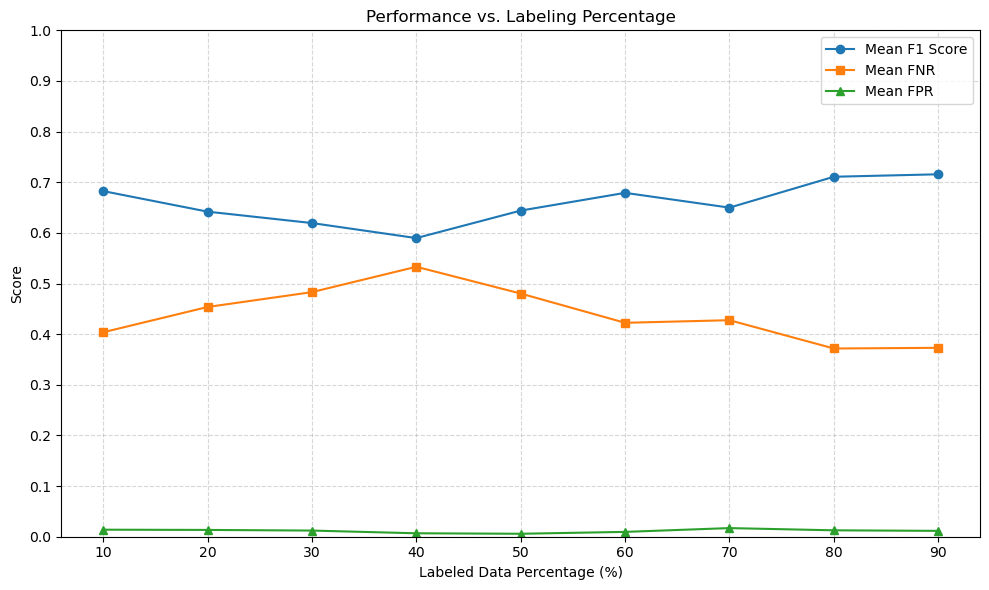

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob
import re

# Define the directory containing the CSV files
base_dir = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/"
pattern = os.path.join(base_dir, "fixmatch_bit_flip_main_wo_al_11_lbr_*.csv")

# Get all matching CSV files
csv_files = glob(pattern)

# Extract label percentages and sort files accordingly
file_info = []
for file in csv_files:
    match = re.search(r"lbr_(\d+\.\d+)", file)
    if match:
        label_pct = float(match.group(1))
        file_info.append((label_pct, file))

# Sort by label percentage
file_info.sort()

# Initialize lists for plotting
label_percentages = []
mean_f1_scores = []
mean_fnrs = []
mean_fprs = []

# Process each file
for label_pct, filepath in file_info:
    df = pd.read_csv(filepath)
    label_percentages.append(int(label_pct * 100))
    mean_f1_scores.append(df['f1'].mean())
    mean_fnrs.append(df['fnr'].mean())
    mean_fprs.append(df['fpr'].mean())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(label_percentages, mean_f1_scores, marker='o', label='Mean F1 Score')
plt.plot(label_percentages, mean_fnrs, marker='s', label='Mean FNR')
plt.plot(label_percentages, mean_fprs, marker='^', label='Mean FPR')
plt.xlabel("Labeled Data Percentage (%)")
plt.ylabel("Score")
# put the y-axis limits to 0-1
plt.ylim(0, 1)  # Set y-axis limits to 0-1 with a step of 0.1
plt.yticks(np.arange(0, 1.1, 0.1))  
# the ylim interval is 0.1
# plt.xlim(0, 100)
# plt.xticks(np.arange(0, 101, 10))
plt.title("Performance vs. Labeling Percentage")
plt.xticks(label_percentages)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


## Number of random bit flip from 3 to 20

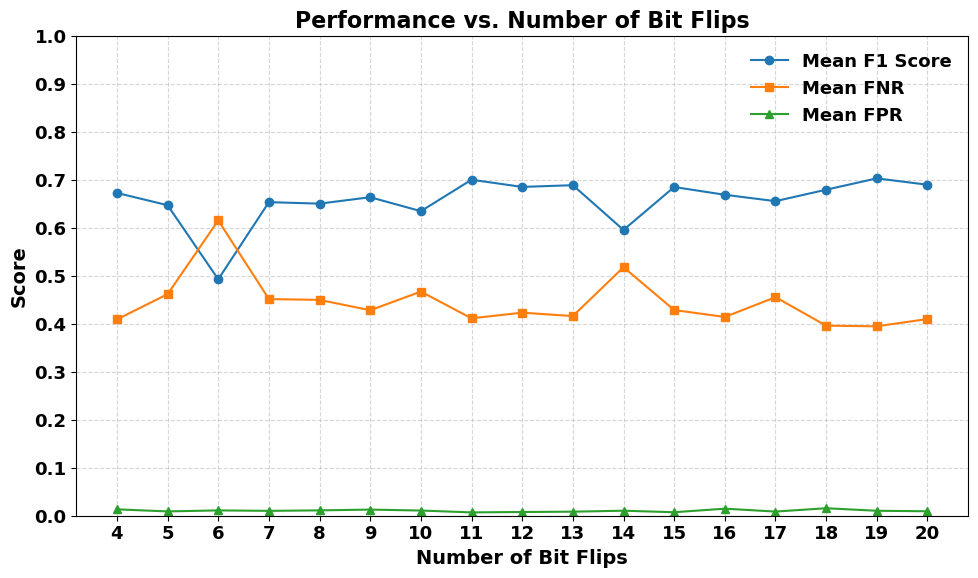

Mean f1 = 0.6575, Mean fnr = 0.4446, Mean fpr = 0.0105


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob
import re

# Define the directory containing the CSV files
base_dir = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/mult_aug/"
pattern = os.path.join(base_dir, "fixmatch_wo_al_random_bit_flip_*_lbr_0.4.csv")

# Get all matching CSV files
csv_files = glob(pattern)

# Extract bit flip values from filenames and sort
file_info = []
for file in csv_files:
    match = re.search(r"bit_flip_(\d+)_lbr", file)
    if match:
        bit_flip = int(match.group(1))
        file_info.append((bit_flip, file))

# Sort by bit flip value
file_info.sort()

# Initialize lists for plotting
n_bit_flip = []
mean_f1_scores = []
mean_fnrs = []
mean_fprs = []

# Process each file
for bit_flip, filepath in file_info:
    df = pd.read_csv(filepath)
    n_bit_flip.append(bit_flip)
    mean_f1_scores.append(df['f1'].mean())
    mean_fnrs.append(df['fnr'].mean())
    mean_fprs.append(df['fpr'].mean())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_bit_flip, mean_f1_scores, marker='o', label='Mean F1 Score')
plt.plot(n_bit_flip, mean_fnrs, marker='s', label='Mean FNR')
plt.plot(n_bit_flip, mean_fprs, marker='^', label='Mean FPR')
plt.xlabel("Number of Bit Flips")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(n_bit_flip)
plt.title("Performance vs. Number of Bit Flips")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
print(f"Mean f1 = {np.mean(mean_f1_scores):.4f}, Mean fnr = {np.mean(mean_fnrs):.4f}, Mean fpr = {np.mean(mean_fprs):.4f}")


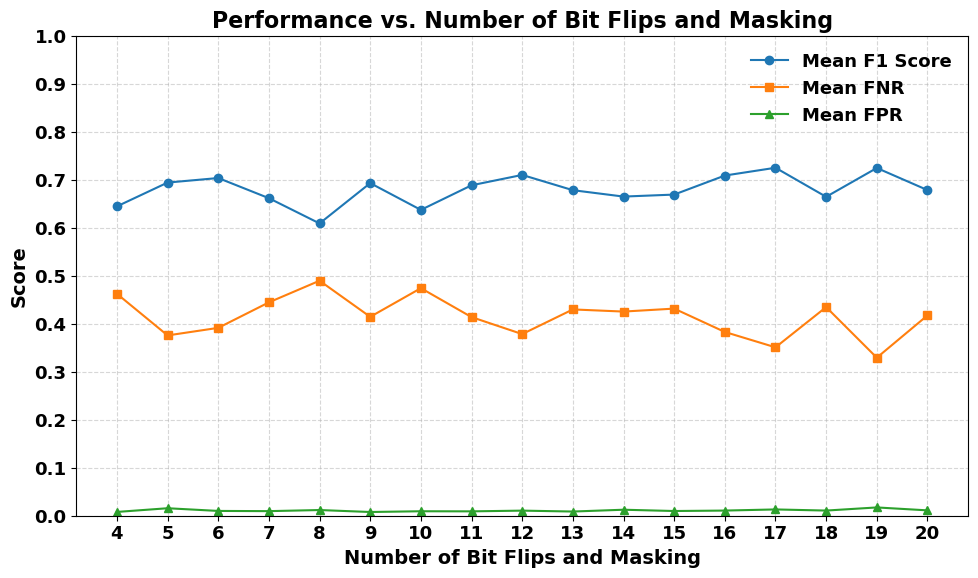

Mean f1 = 0.6805, Mean fnr = 0.4150, Mean fpr = 0.0109


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob
import re

# Define the directory containing the CSV files
base_dir = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/mult_aug/"
pattern = os.path.join(base_dir, "fixmatch_wo_al_random_bit_flip_and_mask_*_lbr_0.4.csv")

# Get all matching CSV files
csv_files = glob(pattern)

# Extract bit flip values from filenames and sort
file_info = []
for file in csv_files:
    match = re.search(r"bit_flip_and_mask_(\d+)_lbr", file)
    if match:
        bit_flip = int(match.group(1))
        file_info.append((bit_flip, file))

# Sort by bit flip value
file_info.sort()

# Initialize lists for plotting
n_bit_flip = []
mean_f1_scores = []
mean_fnrs = []
mean_fprs = []

# Process each file
for bit_flip, filepath in file_info:
    df = pd.read_csv(filepath)
    n_bit_flip.append(bit_flip)
    mean_f1_scores.append(df['f1'].mean())
    mean_fnrs.append(df['fnr'].mean())
    mean_fprs.append(df['fpr'].mean())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_bit_flip, mean_f1_scores, marker='o', label='Mean F1 Score')
plt.plot(n_bit_flip, mean_fnrs, marker='s', label='Mean FNR')
plt.plot(n_bit_flip, mean_fprs, marker='^', label='Mean FPR')
plt.xlabel("Number of Bit Flips and Masking")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(n_bit_flip)
plt.title("Performance vs. Number of Bit Flips and Masking")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
print(f"Mean f1 = {np.mean(mean_f1_scores):.4f}, Mean fnr = {np.mean(mean_fnrs):.4f}, Mean fpr = {np.mean(mean_fprs):.4f}")


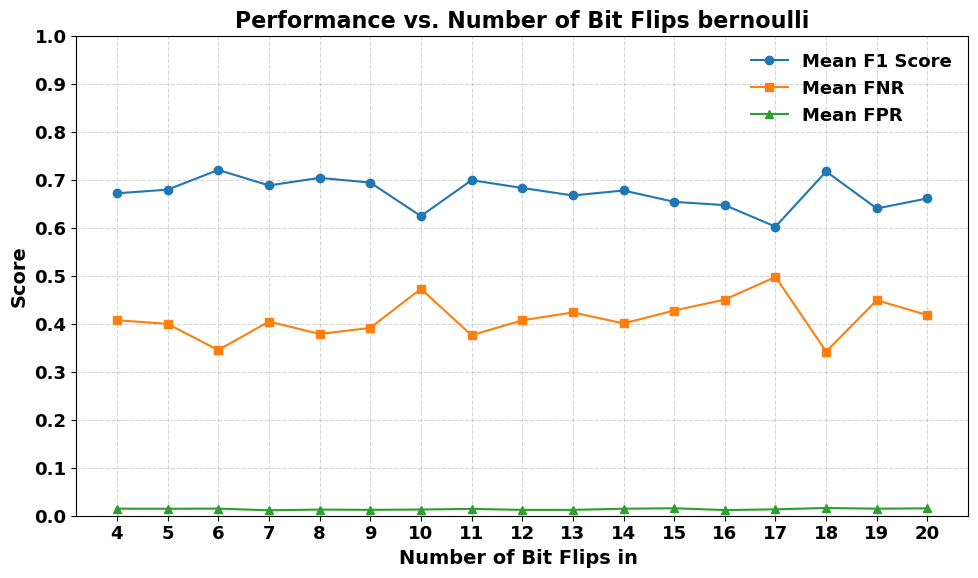

Mean f1 = 0.6732, Mean fnr = 0.4117, Mean fpr = 0.0137


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob
import re

# Define the directory containing the CSV files
base_dir = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/mult_aug/"
pattern = os.path.join(base_dir, "fixmatch_wo_al_random_bit_flip_bernoulli_*_lbr_0.4.csv")

# Get all matching CSV files
csv_files = glob(pattern)

# Extract bit flip values from filenames and sort
file_info = []
for file in csv_files:
    match = re.search(r"bit_flip_bernoulli_(\d+)_lbr", file)
    if match:
        bit_flip = int(match.group(1))
        file_info.append((bit_flip, file))

# Sort by bit flip value
file_info.sort()

# Initialize lists for plotting
n_bit_flip = []
mean_f1_scores = []
mean_fnrs = []
mean_fprs = []

# Process each file
for bit_flip, filepath in file_info:
    df = pd.read_csv(filepath)
    n_bit_flip.append(bit_flip)
    mean_f1_scores.append(df['f1'].mean())
    mean_fnrs.append(df['fnr'].mean())
    mean_fprs.append(df['fpr'].mean())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_bit_flip, mean_f1_scores, marker='o', label='Mean F1 Score')
plt.plot(n_bit_flip, mean_fnrs, marker='s', label='Mean FNR')
plt.plot(n_bit_flip, mean_fprs, marker='^', label='Mean FPR')
plt.xlabel("Number of Bit Flips in ")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(n_bit_flip)
plt.title("Performance vs. Number of Bit Flips bernoulli")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
print(f"Mean f1 = {np.mean(mean_f1_scores):.4f}, Mean fnr = {np.mean(mean_fnrs):.4f}, Mean fpr = {np.mean(mean_fprs):.4f}")


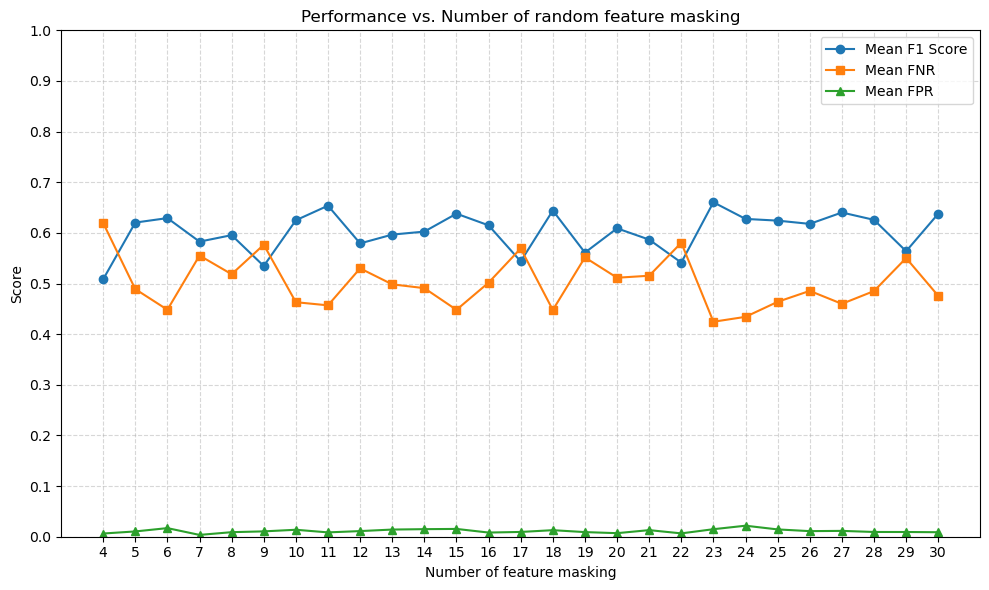

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from glob import glob
import re

# Define the directory containing the CSV files
base_dir = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/mult_aug/"
pattern = os.path.join(base_dir, "fixmatch_wo_al_random_feature_mask_*_lbr_0.4.csv")

# Get all matching CSV files
csv_files = glob(pattern)

# Extract bit flip values from filenames and sort
file_info = []
for file in csv_files:
    match = re.search(r"random_feature_mask_(\d+)_lbr", file)
    if match:
        bit_flip = int(match.group(1))
        file_info.append((bit_flip, file))

# Sort by bit flip value
file_info.sort()

# Initialize lists for plotting
n_bit_flip = []
mean_f1_scores = []
mean_fnrs = []
mean_fprs = []

# Process each file
for bit_flip, filepath in file_info:
    df = pd.read_csv(filepath)
    n_bit_flip.append(bit_flip)
    mean_f1_scores.append(df['f1'].mean())
    mean_fnrs.append(df['fnr'].mean())
    mean_fprs.append(df['fpr'].mean())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_bit_flip, mean_f1_scores, marker='o', label='Mean F1 Score')
plt.plot(n_bit_flip, mean_fnrs, marker='s', label='Mean FNR')
plt.plot(n_bit_flip, mean_fprs, marker='^', label='Mean FPR')
plt.xlabel("Number of feature masking")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(n_bit_flip)
plt.title("Performance vs. Number of random feature masking")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


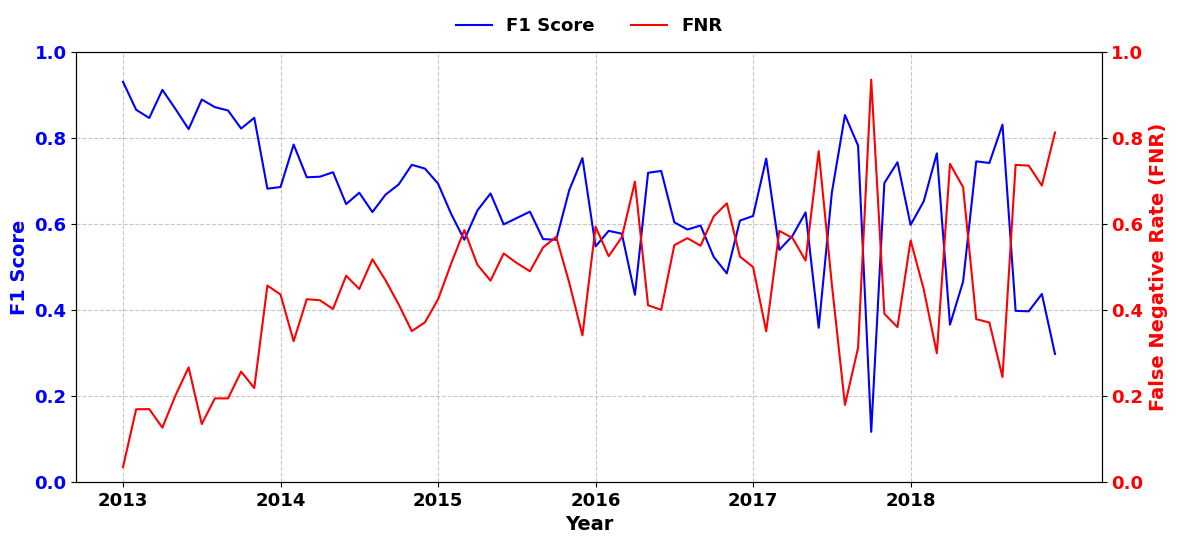

Mean F1: 0.6561, Mean FNR: 0.4545, Mean FPR: 0.0080


In [6]:
path = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/al/fixmatch_wo_al_random_bit_flip_11_lbr_0.4_active.csv"
df = pd.read_csv(path)
years = df["year"]
f1s = df["f1"]
fnrs = df["fnr"]
strategy = "fixmatch_w_al_random_bit_flip_11_lbr_0.4_active"
plot_f1_fnr(years, f1s, fnrs, save_path=f"results/{strategy}_f1_fnr.png")
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {df['fpr'].mean():.4f}")

# General Ploting Function with Error band (Year-month)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Plotting with error bands
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

def plot_f1_fnr(years, f1s, fnrs, f1_std=None, fnr_std=None, save_path="f1_fnr_fixmatch_baseline_with_al.png"):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel("Year")
    ax1.set_ylabel("F1 Score", color="blue")
    ax1.plot(years, f1s, color="blue", label="Mean F1 Score")
    if f1_std is not None:
        ax1.fill_between(years, f1s - f1_std, f1s + f1_std, color="blue", alpha=0.2)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1)
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.set_ylabel("False Negative Rate (FNR)", color="red")
    ax2.plot(years, fnrs, color="red", label="Mean FNR")
    if fnr_std is not None:
        ax2.fill_between(years, fnrs - fnr_std, fnrs + fnr_std, color="red", alpha=0.2)
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.set_ylim(0, 1)
    # need to print mean +- std for f1 and fnr and fpr
    print(f"Mean F1: {f1s.mean()*100:.4f} ± {f1_std.mean()*100:.4f}")
    print(f"Mean FNR: {fnrs.mean()*100:.4f} ± {fnr_std.mean()*100:.4f}")
    print(f"Mean FPR: {mean_fpr.mean()*100:.4f} ± {std_fpr.mean()*100:.4f}")
    # X-axis tick formatting
    xtick_positions = []
    xtick_labels = []
    seen_years = set()
    for idx, ym in enumerate(years):
        year = ym.split("-")[0]
        if year not in seen_years:
            xtick_positions.append(idx)
            xtick_labels.append(year)
            seen_years.add(year)

    ax1.set_xticks(xtick_positions)
    ax1.set_xticklabels(xtick_labels, rotation=0)

    # Add legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path, dpi=300)
    plt.show()


# General Ploting function with Error band (Year_month)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Plotting with error bands
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

def plot_f1_fnr(years, f1s, fnrs, f1_std=None, fnr_std=None, save_path="f1_fnr_fixmatch_baseline_with_al.png"):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel("Year")
    ax1.set_ylabel("F1 Score", color="blue")
    ax1.plot(years, f1s, color="blue", label="Mean F1 Score")
    if f1_std is not None:
        ax1.fill_between(years, f1s - f1_std, f1s + f1_std, color="blue", alpha=0.2)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1)
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.set_ylabel("False Negative Rate (FNR)", color="red")
    ax2.plot(years, fnrs, color="red", label="Mean FNR")
    if fnr_std is not None:
        ax2.fill_between(years, fnrs - fnr_std, fnrs + fnr_std, color="red", alpha=0.2)
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.set_ylim(0, 1)
    # need to print mean +- std for f1 and fnr and fpr
    # print(f"Mean F1: {f1s.mean()*100:.4f} ± {f1_std.mean()*100:.4f}")
    # print(f"Mean FNR: {fnrs.mean()*100:.4f} ± {fnr_std.mean()*100:.4f}")
    # print(f"Mean FPR: {mean_fpr.mean()*100:.4f} ± {std_fpr.mean()*100:.4f}")
    # X-axis tick formatting
    xtick_positions = []
    xtick_labels = []
    seen_years = set()
    for idx, ym in enumerate(years):
        year = ym.split("_")[0]
        if year not in seen_years:
            xtick_positions.append(idx)
            xtick_labels.append(year)
            seen_years.add(year)

    ax1.set_xticks(xtick_positions)
    ax1.set_xticklabels(xtick_labels, rotation=0)

    # Add legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path, dpi=300)
    plt.show()


## year-month

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Plotting with error bands
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

def plot_f1_fnr(years, f1s, fnrs, f1_std=None, fnr_std=None, save_path="f1_fnr_fixmatch_baseline_with_al.png"):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel("Year")
    ax1.set_ylabel("F1 Score", color="blue")
    ax1.plot(years, f1s, color="blue", label="Mean F1 Score")
    if f1_std is not None:
        ax1.fill_between(years, f1s - f1_std, f1s + f1_std, color="blue", alpha=0.2)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1)
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.set_ylabel("False Negative Rate (FNR)", color="red")
    ax2.plot(years, fnrs, color="red", label="Mean FNR")
    if fnr_std is not None:
        ax2.fill_between(years, fnrs - fnr_std, fnrs + fnr_std, color="red", alpha=0.2)
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.set_ylim(0, 1)
    # need to print mean +- std for f1 and fnr and fpr
    # print(f"Mean F1: {f1s.mean()*100:.4f} ± {f1_std.mean()*100:.4f}")
    # print(f"Mean FNR: {fnrs.mean()*100:.4f} ± {fnr_std.mean()*100:.4f}")
    # print(f"Mean FPR: {mean_fpr.mean()*100:.4f} ± {std_fpr.mean()*100:.4f}")
    # X-axis tick formatting
    xtick_positions = []
    xtick_labels = []
    seen_years = set()
    for idx, ym in enumerate(years):
        year = ym.split("-")[0]
        if year not in seen_years:
            xtick_positions.append(idx)
            xtick_labels.append(year)
            seen_years.add(year)

    ax1.set_xticks(xtick_positions)
    ax1.set_xticklabels(xtick_labels, rotation=0)

    # Add legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path, dpi=300)
    plt.show()


### FixMatch self-training learning results

Mean F1: 79.3672 ± 4.9665
Mean FNR: 22.2820 ± 4.0501
Mean FPR: 1.9145 ± 1.2372


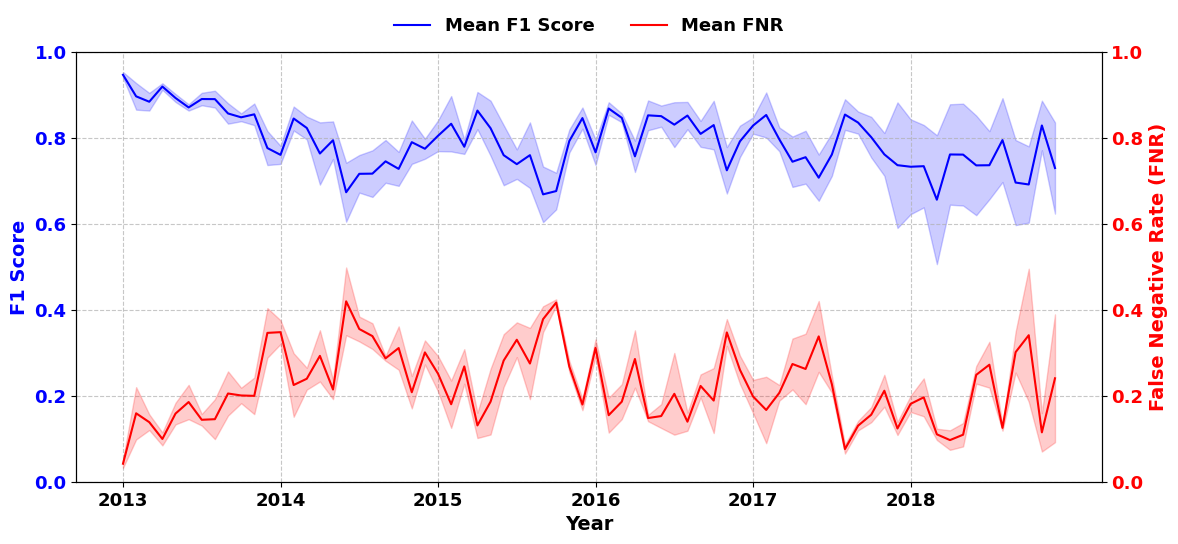

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/al/fixmatch_w_al_random_bit_flip_11_lbr_0.4_seed_*_active.csv"

# Collect all matching CSV files
csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")

# Read and aggregate by 'month' or 'year_month' column
all_dfs = [pd.read_csv(file) for file in csv_files]
merged_df = pd.concat(all_dfs)

# Group by 'month' (or replace with the correct column name if different)
group_col = 'month' if 'month' in merged_df.columns else merged_df.columns[0]
grouped = merged_df.groupby(group_col)

# Compute mean and std for each metric
mean_f1 = grouped['f1'].mean()
std_f1 = grouped['f1'].std()
mean_fnr = grouped['fnr'].mean()
std_fnr = grouped['fnr'].std()
mean_fpr = grouped['fpr'].mean()
std_fpr = grouped['fpr'].std()


# Call the plotting function
plot_f1_fnr(
    years=mean_f1.index,
    f1s=mean_f1.values,
    fnrs=mean_fnr.values,
    f1_std=std_f1.values,
    fnr_std=std_fnr.values,
    save_path="fixmatch_al_bf_f1_fnr_with_error_bands.png"
)

### FixMatch baseline Results:

Mean F1: 70.8866 ± 3.8887
Mean FNR: 40.0399 ± 4.6384
Mean FPR: 0.6709 ± 0.1737


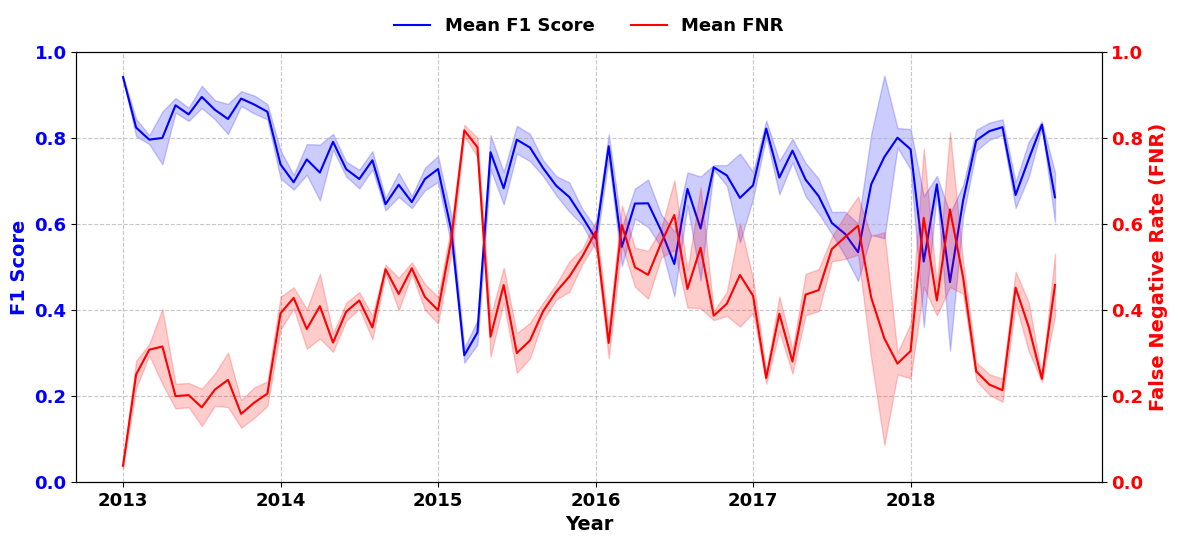

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/baseline_mSeed/fixmatch_wo_al_random_bit_flip_11_lbr_0.4_seed_*.csv"

# Collect all matching CSV files
csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")

# Read and aggregate by 'month' or 'year_month' column
all_dfs = [pd.read_csv(file) for file in csv_files[:5]]
merged_df = pd.concat(all_dfs)

# Group by 'month' (or replace with the correct column name if different)
group_col = 'month' if 'month' in merged_df.columns else merged_df.columns[0]
grouped = merged_df.groupby(group_col)

# Compute mean and std for each metric
mean_f1 = grouped['f1'].mean()
std_f1 = grouped['f1'].std()
mean_fnr = grouped['fnr'].mean()
std_fnr = grouped['fnr'].std()
mean_fpr = grouped['fpr'].mean()
std_fpr = grouped['fpr'].std()


# Call the plotting function
plot_f1_fnr(
    years=mean_f1.index,
    f1s=mean_f1.values,
    fnrs=mean_fnr.values,
    f1_std=std_f1.values,
    fnr_std=std_fnr.values,
    save_path="fixmatch_baseline_bf_f1_fnr_with_error_bands.png"
)

### FixMatch baseline

Found 20 files
Mean F1: 71.2983 ± 3.5244
Mean FNR: 38.6402 ± 5.3850
Mean FPR: 0.8377 ± 0.2718


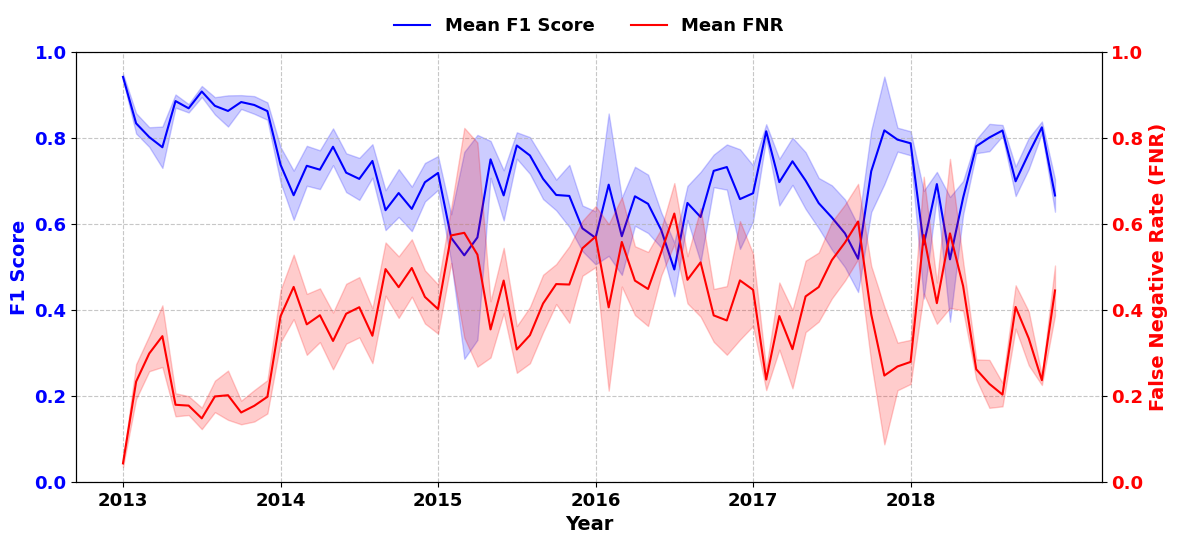

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/baseline_mSeed/fixmatch_wo_al_random_bit_flip_bernoulli_11_lbr_0.4_seed_*.csv"
# pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/baseline_mSeed/fixmatch_wo_al_random_bit_flip_11_lbr_0.4_seed_*.csv"
csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")
print(f"Found {len(csv_files)} files")

# For per-month mean per run
f1_list = []
fnr_list = []
fpr_list = []
index_order = None

f1_s = []
fnr_s = []
fpr_s = []

for file in csv_files:
    df = pd.read_csv(file)
    group_col = 'month' if 'month' in df.columns else df.columns[0]
    grouped = df.groupby(group_col)

    f1 = grouped['f1'].mean()
    fnr = grouped['fnr'].mean()
    fpr = grouped['fpr'].mean()

    f1_s.append(f1.mean())
    fnr_s.append(fnr.mean())
    fpr_s.append(fpr.mean())

    if index_order is None:
        index_order = f1.index  # Save index order (e.g., months)

    f1_list.append(f1.values)
    fnr_list.append(fnr.values)
    fpr_list.append(fpr.values)

# Convert to arrays: shape (n_runs, n_months)
f1_array = np.array(f1_list)
fnr_array = np.array(fnr_list)
fpr_array = np.array(fpr_list)

# Mean and std across seeds for each month (axis=0 is seed)
mean_f1 = f1_array.mean(axis=0)
std_f1 = f1_array.std(axis=0)
mean_fnr = fnr_array.mean(axis=0)
std_fnr = fnr_array.std(axis=0)
mean_fpr = fpr_array.mean(axis=0)
std_fpr = fpr_array.std(axis=0)


## Means of mean f1, fnr, fpr
mean_f1s = np.mean(np.array(f1_s))
std_f1s = np.std(np.array(f1_s))
mean_fnrs = np.mean(np.array(fnr_s))
std_fnrs = np.std(np.array(fnr_s))
mean_fprs = np.mean(np.array(fpr_s))
std_fprs = np.std(np.array(fpr_s))


# Print overall mean ± std
print(f"Mean F1: {mean_f1s*100:.4f} ± {std_f1s*100:.4f}")
print(f"Mean FNR: {mean_fnrs*100:.4f} ± {std_fnrs*100:.4f}")
print(f"Mean FPR: {mean_fprs*100:.4f} ± {std_fprs*100:.4f}")


# Call plotting
plot_f1_fnr(
    years=index_order,
    f1s=mean_f1,
    fnrs=mean_fnr,
    f1_std=std_f1,
    fnr_std=std_fnr,
    save_path="f1_fnr_fixmatch_baseline_bernoulli_with_error_bands.png"
)


### FixMatch active learning results

Found 25 files
Mean F1: 90.1841 ± 0.2041
Mean FNR: 13.9221 ± 0.2772
Mean FPR: 0.4773 ± 0.0405


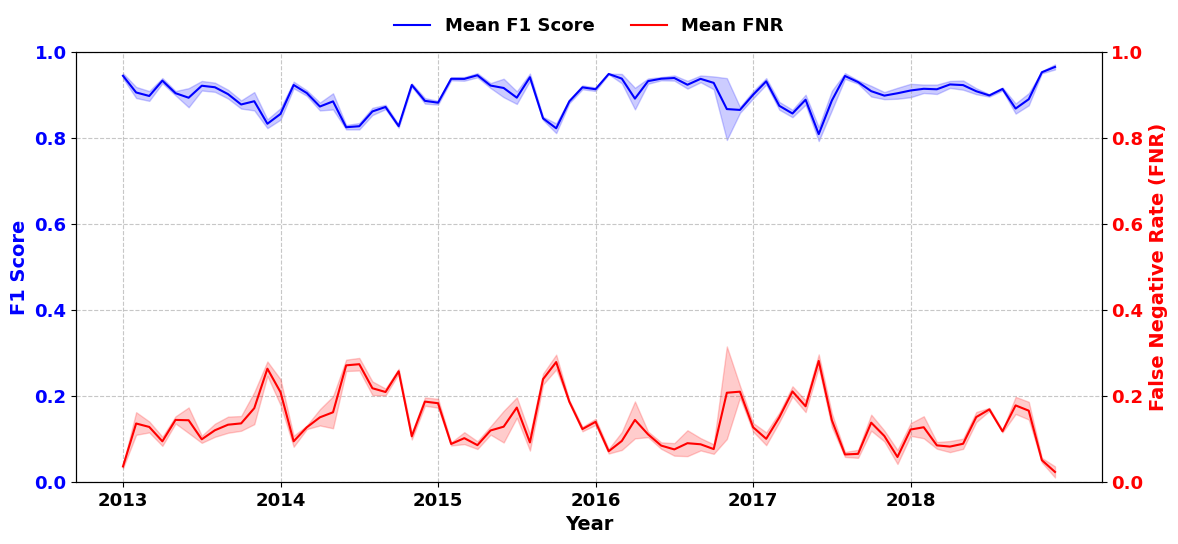

In [5]:
pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/al_uc/fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_*_400lp_1.0_active.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
# pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/al/fixmatch_w_al_random_bit_flip_11_lbr_0.4_seed_*_active.csv"

csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")
print(f"Found {len(csv_files)} files")

# For per-month mean per run
f1_list = []
fnr_list = []
fpr_list = []
index_order = None

f1_s = []
fnr_s = []
fpr_s = []

for file in csv_files[:5]:
    df = pd.read_csv(file)
    group_col = 'month' if 'month' in df.columns else df.columns[0]
    grouped = df.groupby(group_col)

    f1 = grouped['f1'].mean()
    fnr = grouped['fnr'].mean()
    fpr = grouped['fpr'].mean()

    f1_s.append(f1.mean())
    fnr_s.append(fnr.mean())
    fpr_s.append(fpr.mean())

    if index_order is None:
        index_order = f1.index  # Save index order (e.g., months)

    f1_list.append(f1.values)
    fnr_list.append(fnr.values)
    fpr_list.append(fpr.values)

# Convert to arrays: shape (n_runs, n_months)
f1_array = np.array(f1_list)
fnr_array = np.array(fnr_list)
fpr_array = np.array(fpr_list)

# Mean and std across seeds for each month (axis=0 is seed)
mean_f1 = f1_array.mean(axis=0)
std_f1 = f1_array.std(axis=0)
mean_fnr = fnr_array.mean(axis=0)
std_fnr = fnr_array.std(axis=0)
mean_fpr = fpr_array.mean(axis=0)
std_fpr = fpr_array.std(axis=0)


## Means of mean f1, fnr, fpr
mean_f1s = np.mean(np.array(f1_s))
std_f1s = np.std(np.array(f1_s))
mean_fnrs = np.mean(np.array(fnr_s))
std_fnrs = np.std(np.array(fnr_s))
mean_fprs = np.mean(np.array(fpr_s))
std_fprs = np.std(np.array(fpr_s))


# Print overall mean ± std
print(f"Mean F1: {mean_f1s*100:.4f} ± {std_f1s*100:.4f}")
print(f"Mean FNR: {mean_fnrs*100:.4f} ± {std_fnrs*100:.4f}")
print(f"Mean FPR: {mean_fprs*100:.4f} ± {std_fprs*100:.4f}")


# Call plotting
plot_f1_fnr(
    years=index_order,
    f1s=mean_f1,
    fnrs=mean_fnr,
    f1_std=std_f1,
    fnr_std=std_fnr,
    save_path="f1_fnr_fixmatch_al_with_error_bands.png"
)



### FixMatch self-training results:

Found 4 files
Mean F1: 79.3672 ± 1.2880
Mean FNR: 22.2820 ± 0.3462
Mean FPR: 1.9145 ± 0.3828


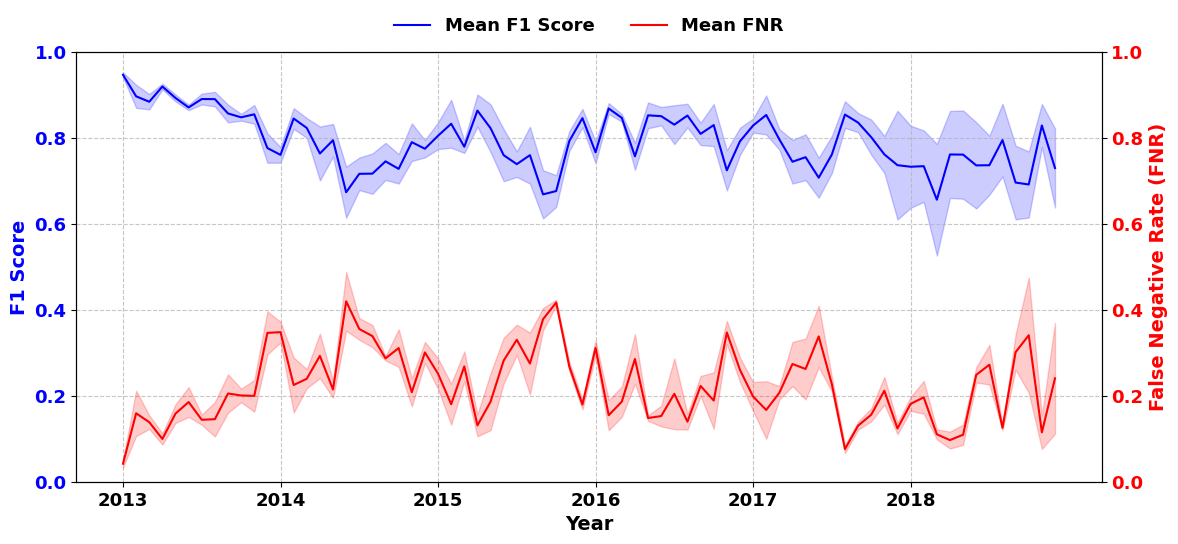

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/al/fixmatch_w_al_random_bit_flip_11_lbr_0.4_seed_*_active.csv"

csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")
print(f"Found {len(csv_files)} files")

# For per-month mean per run
f1_list = []
fnr_list = []
fpr_list = []
index_order = None

f1_s = []
fnr_s = []
fpr_s = []

for file in csv_files:
    df = pd.read_csv(file)
    group_col = 'month' if 'month' in df.columns else df.columns[0]
    grouped = df.groupby(group_col)

    f1 = grouped['f1'].mean()
    fnr = grouped['fnr'].mean()
    fpr = grouped['fpr'].mean()

    f1_s.append(f1.mean())
    fnr_s.append(fnr.mean())
    fpr_s.append(fpr.mean())

    if index_order is None:
        index_order = f1.index  # Save index order (e.g., months)

    f1_list.append(f1.values)
    fnr_list.append(fnr.values)
    fpr_list.append(fpr.values)

# Convert to arrays: shape (n_runs, n_months)
f1_array = np.array(f1_list)
fnr_array = np.array(fnr_list)
fpr_array = np.array(fpr_list)

# Mean and std across seeds for each month (axis=0 is seed)
mean_f1 = f1_array.mean(axis=0)
std_f1 = f1_array.std(axis=0)
mean_fnr = fnr_array.mean(axis=0)
std_fnr = fnr_array.std(axis=0)
mean_fpr = fpr_array.mean(axis=0)
std_fpr = fpr_array.std(axis=0)


## Means of mean f1, fnr, fpr
mean_f1s = np.mean(np.array(f1_s))
std_f1s = np.std(np.array(f1_s))
mean_fnrs = np.mean(np.array(fnr_s))
std_fnrs = np.std(np.array(fnr_s))
mean_fprs = np.mean(np.array(fpr_s))
std_fprs = np.std(np.array(fpr_s))


# Print overall mean ± std
print(f"Mean F1: {mean_f1s*100:.4f} ± {std_f1s*100:.4f}")
print(f"Mean FNR: {mean_fnrs*100:.4f} ± {std_fnrs*100:.4f}")
print(f"Mean FPR: {mean_fprs*100:.4f} ± {std_fprs*100:.4f}")


# Call plotting
plot_f1_fnr(
    years=index_order,
    f1s=mean_f1,
    fnrs=mean_fnr,
    f1_std=std_f1,
    fnr_std=std_fnr,
    save_path="f1_fnr_chen_baseline_with_error_bands.png"
)


### FixMatch baseline with with bit flip

Found 1 files
Mean F1: 0.0000 ± 0.0000
Mean FNR: 100.0000 ± 0.0000
Mean FPR: 0.0000 ± 0.0000


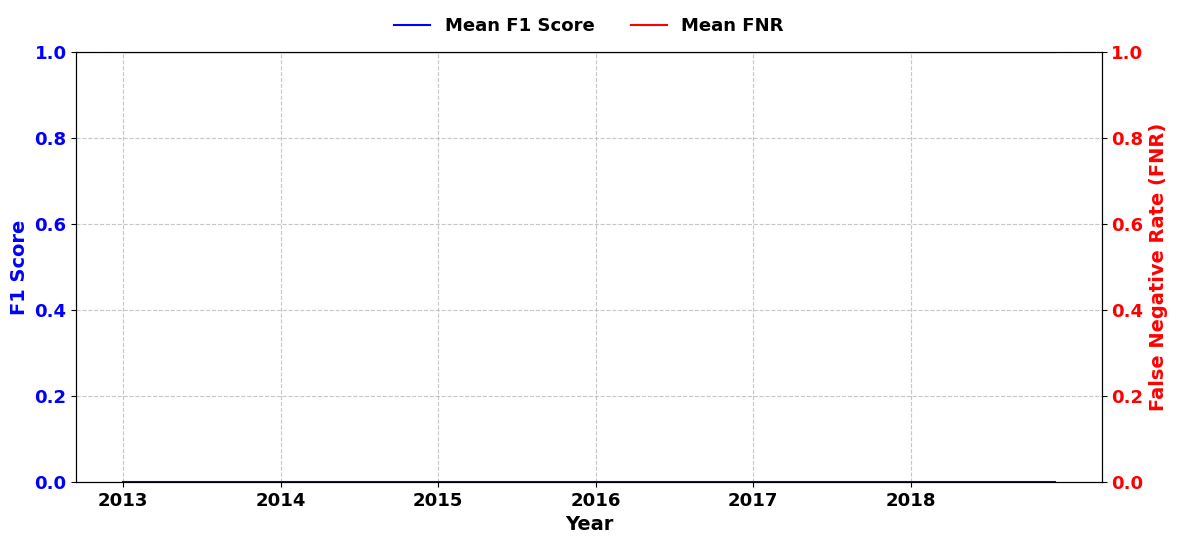

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
# pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/baseline_mSeed/fixmatch_wo_al_random_bit_flip_500_lbr_0.4_seed_*.csv"
pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/fixmatch_1d/fixmatch_baseline_keeping_as_it_is_epoch_1024_seed_52.csv"
csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")
print(f"Found {len(csv_files)} files")

# For per-month mean per run
f1_list = []
fnr_list = []
fpr_list = []
index_order = None

f1_s = []
fnr_s = []
fpr_s = []

for file in csv_files:
    df = pd.read_csv(file)
    group_col = 'month' if 'month' in df.columns else df.columns[0]
    grouped = df.groupby(group_col)

    f1 = grouped['f1'].mean()
    fnr = grouped['fnr'].mean()
    fpr = grouped['fpr'].mean()

    f1_s.append(f1.mean())
    fnr_s.append(fnr.mean())
    fpr_s.append(fpr.mean())

    if index_order is None:
        index_order = f1.index  # Save index order (e.g., months)

    f1_list.append(f1.values)
    fnr_list.append(fnr.values)
    fpr_list.append(fpr.values)

# Convert to arrays: shape (n_runs, n_months)
f1_array = np.array(f1_list)
fnr_array = np.array(fnr_list)
fpr_array = np.array(fpr_list)

# Mean and std across seeds for each month (axis=0 is seed)
mean_f1 = f1_array.mean(axis=0)
std_f1 = f1_array.std(axis=0)
mean_fnr = fnr_array.mean(axis=0)
std_fnr = fnr_array.std(axis=0)
mean_fpr = fpr_array.mean(axis=0)
std_fpr = fpr_array.std(axis=0)


## Means of mean f1, fnr, fpr
mean_f1s = np.mean(np.array(f1_s))
std_f1s = np.std(np.array(f1_s))
mean_fnrs = np.mean(np.array(fnr_s))
std_fnrs = np.std(np.array(fnr_s))
mean_fprs = np.mean(np.array(fpr_s))
std_fprs = np.std(np.array(fpr_s))


# Print overall mean ± std
print(f"Mean F1: {mean_f1s*100:.4f} ± {std_f1s*100:.4f}")
print(f"Mean FNR: {mean_fnrs*100:.4f} ± {std_fnrs*100:.4f}")
print(f"Mean FPR: {mean_fprs*100:.4f} ± {std_fprs*100:.4f}")


# Call plotting
plot_f1_fnr(
    years=index_order,
    f1s=mean_f1,
    fnrs=mean_fnr,
    f1_std=std_f1,
    fnr_std=std_fnr,
    save_path="f1_fnr_chen_baseline_with_error_bands.png"
)



### Chen-Baseline results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Plotting with error bands
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

def plot_f1_fnr(years, f1s, fnrs, f1_std=None, fnr_std=None, save_path="f1_fnr_fixmatch_baseline_with_al.png"):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel("Year")
    ax1.set_ylabel("F1 Score", color="blue")
    ax1.plot(years, f1s, color="blue", label="Mean F1 Score")
    if f1_std is not None:
        ax1.fill_between(years, f1s - f1_std, f1s + f1_std, color="blue", alpha=0.2)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1)
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.set_ylabel("False Negative Rate (FNR)", color="red")
    ax2.plot(years, fnrs, color="red", label="Mean FNR")
    if fnr_std is not None:
        ax2.fill_between(years, fnrs - fnr_std, fnrs + fnr_std, color="red", alpha=0.2)
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.set_ylim(0, 1)
    # need to print mean +- std for f1 and fnr and fpr
    # print(f"Mean F1: {f1s.mean()*100:.4f} ± {f1_std.mean()*100:.4f}")
    # print(f"Mean FNR: {fnrs.mean()*100:.4f} ± {fnr_std.mean()*100:.4f}")
    # print(f"Mean FPR: {mean_fpr.mean()*100:.4f} ± {std_fpr.mean()*100:.4f}")
    # X-axis tick formatting
    xtick_positions = []
    xtick_labels = []
    seen_years = set()
    for idx, ym in enumerate(years):
        year = ym.split("-")[0]
        if year not in seen_years:
            xtick_positions.append(idx)
            xtick_labels.append(year)
            seen_years.add(year)

    ax1.set_xticks(xtick_positions)
    ax1.set_xticklabels(xtick_labels, rotation=0)

    # Add legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path, dpi=300)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
pattern = "/home/mhaque3/myDir/active-learning/results_chen_baseline/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt200_*_metrices.csv"
csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")
print(f"Found {len(csv_files)} files")

# For per-month mean per run
f1_list = []
fnr_list = []
fpr_list = []
index_order = None

f1_s = []
fnr_s = []
fpr_s = []

for file in csv_files:
    df = pd.read_csv(file, delimiter='\t')
    group_col = 'month' if 'month' in df.columns else df.columns[0]
    grouped = df.groupby(group_col)

    f1 = grouped['F1'].mean()
    fnr = grouped['FNR'].mean()
    fpr = grouped['FPR'].mean()

    f1_s.append(f1.mean())
    fnr_s.append(fnr.mean())
    fpr_s.append(fpr.mean())

    if index_order is None:
        index_order = f1.index  # Save index order (e.g., months)

    f1_list.append(f1.values)
    fnr_list.append(fnr.values)
    fpr_list.append(fpr.values)

# Convert to arrays: shape (n_runs, n_months)
f1_array = np.array(f1_list)
fnr_array = np.array(fnr_list)
fpr_array = np.array(fpr_list)

# Mean and std across seeds for each month (axis=0 is seed)
mean_f1 = f1_array.mean(axis=0)
std_f1 = f1_array.std(axis=0)
mean_fnr = fnr_array.mean(axis=0)
std_fnr = fnr_array.std(axis=0)
mean_fpr = fpr_array.mean(axis=0)
std_fpr = fpr_array.std(axis=0)


## Means of mean f1, fnr, fpr
mean_f1s = np.mean(np.array(f1_s))
std_f1s = np.std(np.array(f1_s))
mean_fnrs = np.mean(np.array(fnr_s))
std_fnrs = np.std(np.array(fnr_s))
mean_fprs = np.mean(np.array(fpr_s))
std_fprs = np.std(np.array(fpr_s))


# Print overall mean ± std
print(f"Mean F1: {mean_f1s*100:.4f} ± {std_f1s*100:.4f}")
print(f"Mean FNR: {mean_fnrs*100:.4f} ± {std_fnrs*100:.4f}")
print(f"Mean FPR: {mean_fprs*100:.4f} ± {std_fprs*100:.4f}")

# Plotting function (Year-month)


# Call plotting
plot_f1_fnr(
    years=index_order,
    f1s=mean_f1,
    fnrs=mean_fnr,
    f1_std=std_f1,
    fnr_std=std_fnr,
    save_path="f1_fnr_chen_baseline_with_error_bands.png"
)


FileNotFoundError: No CSV files matched the given pattern.

### Chen-AL

### chen-baseline API

In [12]:
path = "/home/mhaque3/myDir/active-learning/results_chen_AL_baseline/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt200.csv"

df = pd.read_csv(path, delimiter='\t')
# start from date 2013-07
df = df[df['date'] >= '2013-07']

years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")   


Mean F1: 0.6043, Mean FNR: 0.4723, Mean FPR: 0.0200


Found 1 files
Mean F1: 92.1407 ± 0.0000
Mean FNR: 10.2248 ± 0.0000
Mean FPR: 0.5108 ± 0.0000


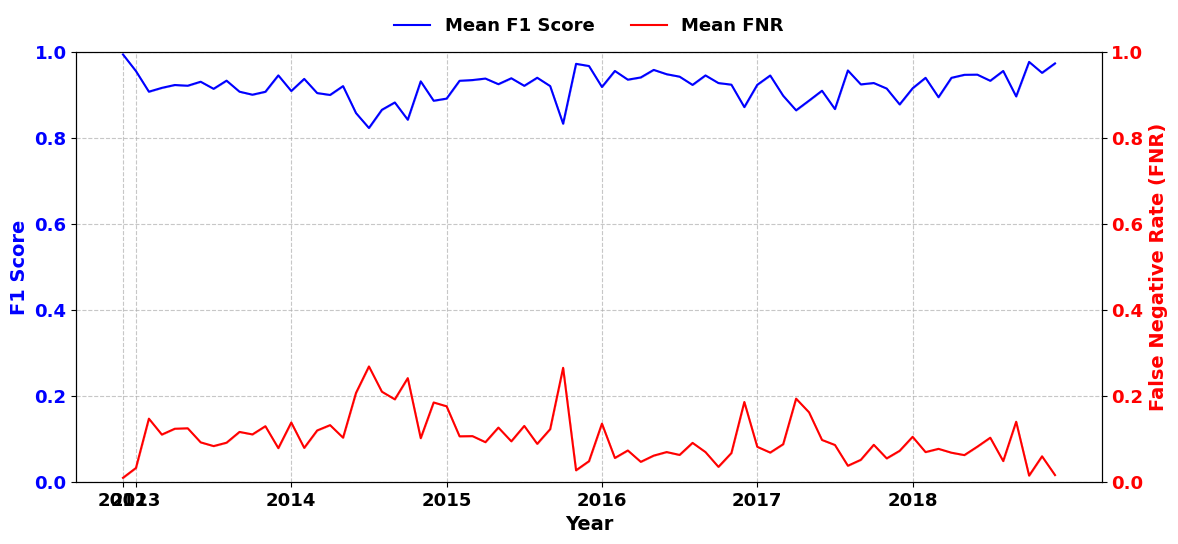

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
pattern = "/home/mhaque3/myDir/active-learning/results_ours/gen_apigraph_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt400.csv"

csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")
print(f"Found {len(csv_files)} files")

# For per-month mean per run
f1_list = []
fnr_list = []
fpr_list = []
index_order = None

f1_s = []
fnr_s = []
fpr_s = []

for file in csv_files:
    df = pd.read_csv(file, delimiter='\t')
    group_col = 'month' if 'month' in df.columns else df.columns[0]
    grouped = df.groupby(group_col)

    f1 = grouped['F1'].mean()
    fnr = grouped['FNR'].mean()
    fpr = grouped['FPR'].mean()

    f1_s.append(f1.mean())
    fnr_s.append(fnr.mean())
    fpr_s.append(fpr.mean())

    if index_order is None:
        index_order = f1.index  # Save index order (e.g., months)

    f1_list.append(f1.values)
    fnr_list.append(fnr.values)
    fpr_list.append(fpr.values)

# Convert to arrays: shape (n_runs, n_months)
f1_array = np.array(f1_list)
fnr_array = np.array(fnr_list)
fpr_array = np.array(fpr_list)

# Mean and std across seeds for each month (axis=0 is seed)
mean_f1 = f1_array.mean(axis=0)
std_f1 = f1_array.std(axis=0)
mean_fnr = fnr_array.mean(axis=0)
std_fnr = fnr_array.std(axis=0)
mean_fpr = fpr_array.mean(axis=0)
std_fpr = fpr_array.std(axis=0)


## Means of mean f1, fnr, fpr
mean_f1s = np.mean(np.array(f1_s))
std_f1s = np.std(np.array(f1_s))
mean_fnrs = np.mean(np.array(fnr_s))
std_fnrs = np.std(np.array(fnr_s))
mean_fprs = np.mean(np.array(fpr_s))
std_fprs = np.std(np.array(fpr_s))


# Print overall mean ± std
print(f"Mean F1: {mean_f1s*100:.4f} ± {std_f1s*100:.4f}")
print(f"Mean FNR: {mean_fnrs*100:.4f} ± {std_fnrs*100:.4f}")
print(f"Mean FPR: {mean_fprs*100:.4f} ± {std_fprs*100:.4f}")

# Plotting function
def plot_f1_fnr(years, f1s, fnrs, f1_std=None, fnr_std=None, save_path="f1_fnr_plot.png"):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel("Year")
    ax1.set_ylabel("F1 Score", color="blue")
    ax1.plot(years, f1s, color="blue", label="Mean F1 Score")
    if f1_std is not None:
        ax1.fill_between(years, f1s - f1_std, f1s + f1_std, color="blue", alpha=0.2)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1)
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.set_ylabel("False Negative Rate (FNR)", color="red")
    ax2.plot(years, fnrs, color="red", label="Mean FNR")
    if fnr_std is not None:
        ax2.fill_between(years, fnrs - fnr_std, fnrs + fnr_std, color="red", alpha=0.2)
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.set_ylim(0, 1)

    # Set x-axis ticks for years only
    xtick_positions = []
    xtick_labels = []
    seen_years = set()
    for idx, ym in enumerate(years):
        year = ym.split("-")[0]
        if year not in seen_years:
            xtick_positions.append(idx)
            xtick_labels.append(year)
            seen_years.add(year)

    ax1.set_xticks(xtick_positions)
    ax1.set_xticklabels(xtick_labels, rotation=0)

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path, dpi=300)
    plt.show()

# Call plotting
plot_f1_fnr(
    years=index_order,
    f1s=mean_f1,
    fnrs=mean_fnr,
    f1_std=std_f1,
    fnr_std=std_fnr,
    save_path="f1_fnr_chen_al_200_with_error_bands.png"
)


### Chen-AL multiple budgets

Found 5 files
Mean F1: 91.8152 ± 1.0861
Mean FNR: 10.4805 ± 0.3443
Mean FPR: 1.0460 ± 1.2032


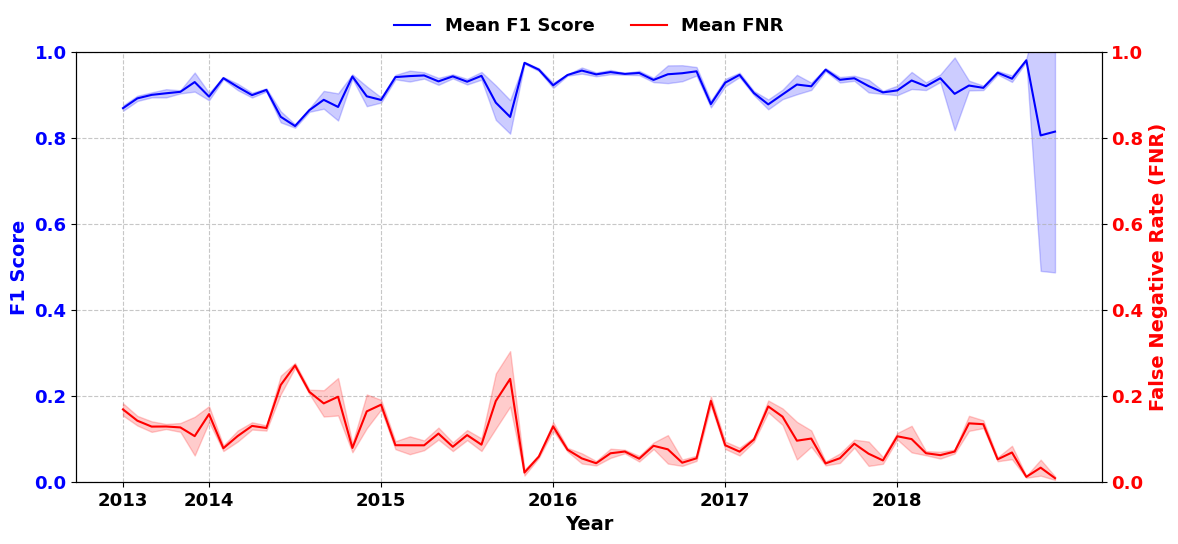

In [25]:
# for Chen Androzoo 400 budget
# pattern = "/home/mhaque3/myDir/active-learning/chen_al_andro_400_2020_7/gen_apigraph_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt400_*_scores.csv"
# for 50 budget
pattern = "/home/mhaque3/myDir/active-learning/chen_al_andro_50_7/gen_andro_cnt50_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt50_*_scores.csv"
# # for 100 budget
# pattern = "/home/mhaque3/myDir/active-learning/chen_al_andro_100_7/gen_andro_cnt100_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt100_*_scores.csv"
# # for 200 budget
# pattern = "/home/mhaque3/myDir/active-learning/chen_al_andro_200_7/gen_andro_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt200_*_scores.csv"
# # for 400 budget
# pattern = "/home/mhaque3/myDir/active-learning/chen_al_andro_400_2020_7/gen_apigraph_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt400_*_scores.csv"


# for Chen API graph
# for 50 budget
pattern = "/home/mhaque3/myDir/active-learning/chen_al_api_50_7/gen_apigraph_cnt50_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-07_2018-12_cnt50_*_scores.csv"
# for 100 budget
pattern = "/home/mhaque3/myDir/active-learning/chen_al_api_100_7/gen_apigraph_cnt100_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-07_2018-12_cnt100_*_scores.csv"
# for 200 budget
pattern = "/home/mhaque3/myDir/active-learning/chen_al_api_200_7/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-07_2018-12_cnt200_*_scores.csv"
# for 400 budget
pattern = "/home/mhaque3/myDir/active-learning/chen_al_api_400_7/gen_apigraph_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-07_2018-12_cnt400_*_scores.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
# pattern = "/home/mhaque3/myDir/active-learning/results_ours/gen_apigraph_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt400.csv"

csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")
print(f"Found {len(csv_files)} files")

# For per-month mean per run
f1_list = []
fnr_list = []
fpr_list = []
index_order = None

f1_s = []
fnr_s = []
fpr_s = []

for file in csv_files:
    df = pd.read_csv(file, delimiter='\t')
    group_col = 'month' if 'month' in df.columns else df.columns[0]
    grouped = df.groupby(group_col)

    f1 = grouped['F1'].mean()
    fnr = grouped['FNR'].mean()
    fpr = grouped['FPR'].mean()

    f1_s.append(f1.mean())
    fnr_s.append(fnr.mean())
    fpr_s.append(fpr.mean())

    if index_order is None:
        index_order = f1.index  # Save index order (e.g., months)

    f1_list.append(f1.values)
    fnr_list.append(fnr.values)
    fpr_list.append(fpr.values)

# Convert to arrays: shape (n_runs, n_months)
f1_array = np.array(f1_list)
fnr_array = np.array(fnr_list)
fpr_array = np.array(fpr_list)

# Mean and std across seeds for each month (axis=0 is seed)
mean_f1 = f1_array.mean(axis=0)
std_f1 = f1_array.std(axis=0)
mean_fnr = fnr_array.mean(axis=0)
std_fnr = fnr_array.std(axis=0)
mean_fpr = fpr_array.mean(axis=0)
std_fpr = fpr_array.std(axis=0)


## Means of mean f1, fnr, fpr
mean_f1s = np.mean(np.array(f1_s))
std_f1s = np.std(np.array(f1_s))
mean_fnrs = np.mean(np.array(fnr_s))
std_fnrs = np.std(np.array(fnr_s))
mean_fprs = np.mean(np.array(fpr_s))
std_fprs = np.std(np.array(fpr_s))


# Print overall mean ± std
print(f"Mean F1: {mean_f1s*100:.4f} ± {std_f1s*100:.4f}")
print(f"Mean FNR: {mean_fnrs*100:.4f} ± {std_fnrs*100:.4f}")
print(f"Mean FPR: {mean_fprs*100:.4f} ± {std_fprs*100:.4f}")

# Plotting function
def plot_f1_fnr(years, f1s, fnrs, f1_std=None, fnr_std=None, save_path="f1_fnr_plot.png"):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel("Year")
    ax1.set_ylabel("F1 Score", color="blue")
    ax1.plot(years, f1s, color="blue", label="Mean F1 Score")
    if f1_std is not None:
        ax1.fill_between(years, f1s - f1_std, f1s + f1_std, color="blue", alpha=0.2)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1)
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.set_ylabel("False Negative Rate (FNR)", color="red")
    ax2.plot(years, fnrs, color="red", label="Mean FNR")
    if fnr_std is not None:
        ax2.fill_between(years, fnrs - fnr_std, fnrs + fnr_std, color="red", alpha=0.2)
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.set_ylim(0, 1)

    # Set x-axis ticks for years only
    xtick_positions = []
    xtick_labels = []
    seen_years = set()
    for idx, ym in enumerate(years):
        year = ym.split("-")[0]
        if year not in seen_years:
            xtick_positions.append(idx)
            xtick_labels.append(year)
            seen_years.add(year)

    ax1.set_xticks(xtick_positions)
    ax1.set_xticklabels(xtick_labels, rotation=0)

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path, dpi=300)
    plt.show()

# Call plotting
plot_f1_fnr(
    years=index_order,
    f1s=mean_f1,
    fnrs=mean_fnr,
    f1_std=std_f1,
    fnr_std=std_fnr,
    save_path="f1_fnr_chen_al_api_100_with_error_bands.png"
)



### CADE-AL results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Plotting with error bands
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

def plot_f1_fnr(years, f1s, fnrs, f1_std=None, fnr_std=None, save_path="f1_fnr_fixmatch_baseline_with_al.png"):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel("Year")
    ax1.set_ylabel("F1 Score", color="blue")
    ax1.plot(years, f1s, color="blue", label="Mean F1 Score")
    if f1_std is not None:
        ax1.fill_between(years, f1s - f1_std, f1s + f1_std, color="blue", alpha=0.2)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1)
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.set_ylabel("False Negative Rate (FNR)", color="red")
    ax2.plot(years, fnrs, color="red", label="Mean FNR")
    if fnr_std is not None:
        ax2.fill_between(years, fnrs - fnr_std, fnrs + fnr_std, color="red", alpha=0.2)
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.set_ylim(0, 1)
    # need to print mean +- std for f1 and fnr and fpr
    # print(f"Mean F1: {f1s.mean()*100:.4f} ± {f1_std.mean()*100:.4f}")
    # print(f"Mean FNR: {fnrs.mean()*100:.4f} ± {fnr_std.mean()*100:.4f}")
    # print(f"Mean FPR: {mean_fpr.mean()*100:.4f} ± {std_fpr.mean()*100:.4f}")
    # X-axis tick formatting
    xtick_positions = []
    xtick_labels = []
    seen_years = set()
    for idx, ym in enumerate(years):
        year = ym.split("-")[0]
        if year not in seen_years:
            xtick_positions.append(idx)
            xtick_labels.append(year)
            seen_years.add(year)

    ax1.set_xticks(xtick_positions)
    ax1.set_xticklabels(xtick_labels, rotation=0)

    # Add legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path, dpi=300)
    plt.show()


Found 4 files
Mean F1: 89.1661 ± 0.5394
Mean FNR: 13.2344 ± 0.5690
Mean FPR: 0.8018 ± 0.1591


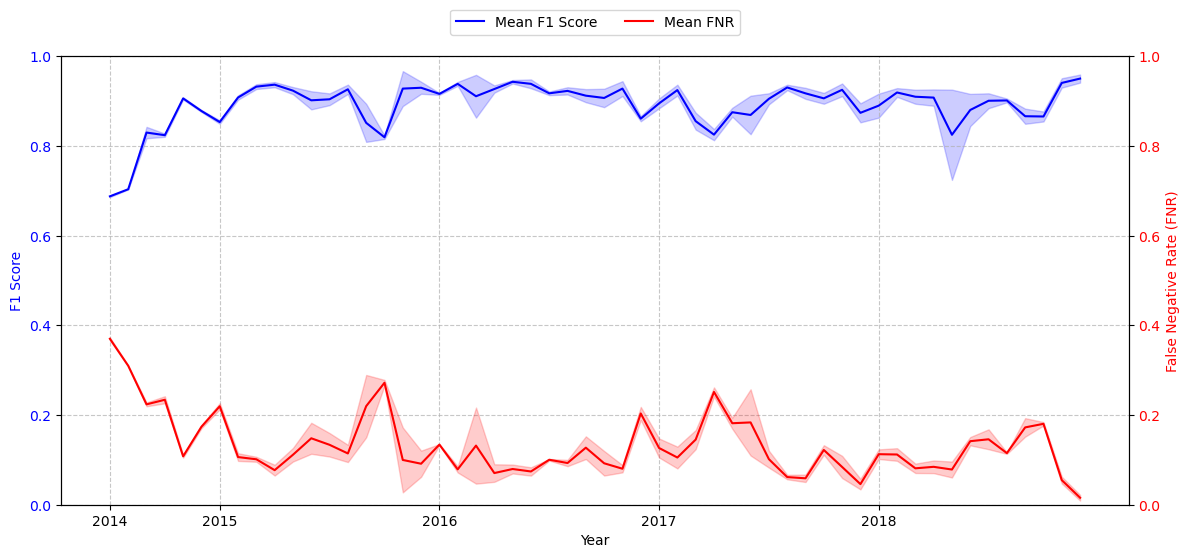

In [5]:
# For CADE API Graph Dataset
# for 50 budget
pattern = "/home/mhaque3/myDir/active-learning/cade_api_50_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2014-07_2018-12_cnt50_*_scores.csv"
# for 100 budget
pattern = "/home/mhaque3/myDir/active-learning/cade_api_100_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2014-07_2018-12_cnt100_*_scores.csv"
# for 200 budget
pattern = "/home/mhaque3/myDir/active-learning/cade_api_200_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2014-07_2018-12_cnt200_*_scores.csv"
# for 400 budget
pattern = "/home/mhaque3/myDir/active-learning/cade_api_400_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2014-07_2018-12_cnt400_*_scores.csv"



# For CADE Androzoo dataset
# for 50 budget
# pattern = "/home/mhaque3/myDir/active-learning/cade_andro_50_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2020-07_2021-12_cnt50*_scores.csv"
# # for 100 budget
# pattern = "/home/mhaque3/myDir/active-learning/cade_andro_100_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2020-07_2021-12_cnt100*_scores.csv"
# # for 200 budget
# pattern = "/home/mhaque3/myDir/active-learning/cade_andro_200_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2020-07_2021-12_cnt200_*_scores.csv"
# # for 400 budget
# pattern = "/home/mhaque3/myDir/active-learning/cade_androo_400_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2020-07_2021-12_cnt400_*_scores.csv"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
# pattern = "/home/mhaque3/myDir/active-learning/results_ours/gen_apigraph_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt400.csv"

csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")
print(f"Found {len(csv_files)} files")

# For per-month mean per run
f1_list = []
fnr_list = []
fpr_list = []
index_order = None

f1_s = []
fnr_s = []
fpr_s = []

for file in csv_files:
    df = pd.read_csv(file, delimiter='\t')
    group_col = 'month' if 'month' in df.columns else df.columns[0]
    grouped = df.groupby(group_col)

    f1 = grouped['F1'].mean()
    fnr = grouped['FNR'].mean()
    fpr = grouped['FPR'].mean()

    f1_s.append(f1.mean())
    fnr_s.append(fnr.mean())
    fpr_s.append(fpr.mean())

    if index_order is None:
        index_order = f1.index  # Save index order (e.g., months)

    f1_list.append(f1.values)
    fnr_list.append(fnr.values)
    fpr_list.append(fpr.values)

# Convert to arrays: shape (n_runs, n_months)
f1_array = np.array(f1_list)
fnr_array = np.array(fnr_list)
fpr_array = np.array(fpr_list)

# Mean and std across seeds for each month (axis=0 is seed)
mean_f1 = f1_array.mean(axis=0)
std_f1 = f1_array.std(axis=0)
mean_fnr = fnr_array.mean(axis=0)
std_fnr = fnr_array.std(axis=0)
mean_fpr = fpr_array.mean(axis=0)
std_fpr = fpr_array.std(axis=0)


## Means of mean f1, fnr, fpr
mean_f1s = np.mean(np.array(f1_s))
std_f1s = np.std(np.array(f1_s))
mean_fnrs = np.mean(np.array(fnr_s))
std_fnrs = np.std(np.array(fnr_s))
mean_fprs = np.mean(np.array(fpr_s))
std_fprs = np.std(np.array(fpr_s))


# Print overall mean ± std
print(f"Mean F1: {mean_f1s*100:.4f} ± {std_f1s*100:.4f}")
print(f"Mean FNR: {mean_fnrs*100:.4f} ± {std_fnrs*100:.4f}")
print(f"Mean FPR: {mean_fprs*100:.4f} ± {std_fprs*100:.4f}")

# Plotting function
def plot_f1_fnr(years, f1s, fnrs, f1_std=None, fnr_std=None, save_path="f1_fnr_plot.png"):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel("Year")
    ax1.set_ylabel("F1 Score", color="blue")
    ax1.plot(years, f1s, color="blue", label="Mean F1 Score")
    if f1_std is not None:
        ax1.fill_between(years, f1s - f1_std, f1s + f1_std, color="blue", alpha=0.2)
    ax1.tick_params(axis="y", labelcolor="blue")
    ax1.set_ylim(0, 1)
    ax1.grid(True, which='both', linestyle='--', alpha=0.7)

    ax2 = ax1.twinx()
    ax2.set_ylabel("False Negative Rate (FNR)", color="red")
    ax2.plot(years, fnrs, color="red", label="Mean FNR")
    if fnr_std is not None:
        ax2.fill_between(years, fnrs - fnr_std, fnrs + fnr_std, color="red", alpha=0.2)
    ax2.tick_params(axis="y", labelcolor="red")
    ax2.set_ylim(0, 1)

    # Set x-axis ticks for years only
    xtick_positions = []
    xtick_labels = []
    seen_years = set()
    for idx, ym in enumerate(years):
        year = ym.split("-")[0]
        if year not in seen_years:
            xtick_positions.append(idx)
            xtick_labels.append(year)
            seen_years.add(year)

    ax1.set_xticks(xtick_positions)
    ax1.set_xticklabels(xtick_labels, rotation=0)

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)

    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path, dpi=300)
    plt.show()

# Call plotting
plot_f1_fnr(
    years=index_order,
    f1s=mean_f1,
    fnrs=mean_fnr,
    f1_std=std_f1,
    fnr_std=std_fnr,
    save_path="f1_fnr_cade_al_50_with_error_bands.png"
)


### Chen-AL baseline Androzoo

In [ ]:
path = "/home/mhaque3/myDir/active-learning/results_chen_baseline_andro/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-01_2021-12_cnt200_06.23-19.06.00.csv"



### CADE baseline results

In [3]:
# CADE API Graph baseline
path = "/home/mhaque3/myDir/active-learning/cade_baseline_apigraph/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e200_wlr5e-05_we50_mwlr5e-05_mwe50_test_2013-07_2018-12_cnt400_07.27-17.59.35.csv"
# CADE androzoo baseline
# path = "/home/mhaque3/myDir/active-learning/cade_baseline_androzoo/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2020-07_2021-12_cnt400_07.27-17.50.23.csv"

import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")


Mean F1: 0.6561, Mean FNR: 0.3879, Mean FPR: 0.0245


### Plot Results for Different Lp

In [ ]:
import pandas as pd
import glob
import os

# Define the glob pattern
pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/al_uc/fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_10_400_lp_*_active.csv"

# Find all matching files
csv_files = glob.glob(pattern)

f1_scores = []
fnr_scores = []

print(f"📂 Found {len(csv_files)} files")

for file_path in csv_files:
    try:
        df = pd.read_csv(file_path, sep=",")
        f1_mean = df["f1"].mean()
        fnr_mean = df["fnr"].mean()

        f1_scores.append(f1_mean)
        fnr_scores.append(fnr_mean)

        # print(f"{os.path.basename(file_path)} → F1: {f1_mean:.4f}, FNR: {fnr_mean:.4f}")
    except Exception as e:
        print(f"Skipping {file_path} due to error: {e}")

# Compute final averages
avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0
avg_fnr = sum(fnr_scores) / len(fnr_scores) if fnr_scores else 0

print("\nFinal Summary Across All Files")
print(f"Average F1-Score: {avg_f1:.4f}")
print(f"Mean FNR:        {avg_fnr:.4f}")


📂 Found 6 files
✅ fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_10_400_lp_2.0_active.csv → F1: 0.9038, FNR: 0.1361
✅ fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_10_400_lp_3.0_active.csv → F1: 0.9022, FNR: 0.1410
✅ fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_10_400_lp_4.0_active.csv → F1: 0.8985, FNR: 0.1425
✅ fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_10_400_lp_5.0_active.csv → F1: 0.8965, FNR: 0.1417
✅ fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_10_400_lp_6.0_active.csv → F1: 0.9032, FNR: 0.1392
✅ fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_10_400_lp_7.0_active.csv → F1: 0.9000, FNR: 0.1460

📊 Final Summary Across All Files
🔹 Average F1-Score: 0.9007
🔹 Mean FNR:        0.1411


📂 Found 7 files
✅ lp=2.0 → F1: 0.9038, FNR: 0.1361
✅ lp=3.0 → F1: 0.9022, FNR: 0.1410
✅ lp=4.0 → F1: 0.8985, FNR: 0.1425
✅ lp=5.0 → F1: 0.8965, FNR: 0.1417
✅ lp=6.0 → F1: 0.9032, FNR: 0.1392
✅ lp=7.0 → F1: 0.9000, FNR: 0.1460
✅ lp=8.0 → F1: 0.9053, FNR: 0.1400


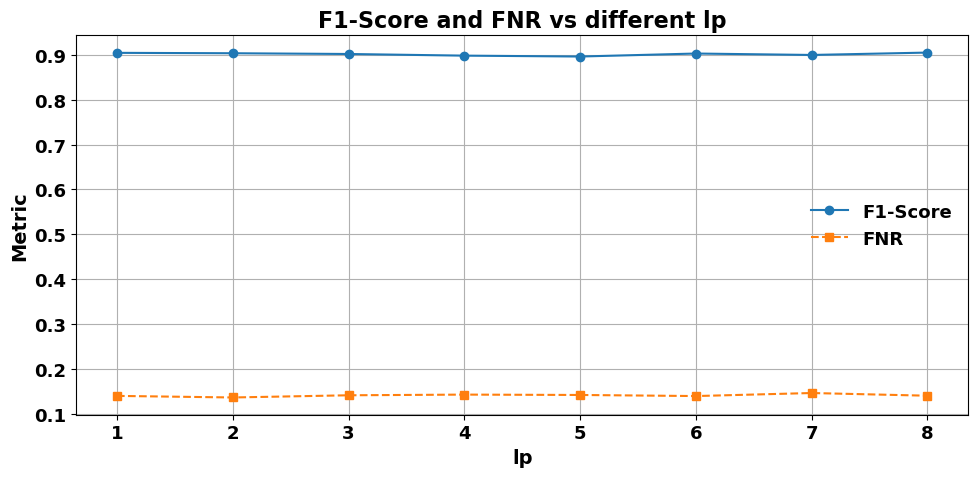

In [ ]:
import pandas as pd
import glob
import os
import re
import matplotlib.pyplot as plt

# Path pattern for your CSV files
pattern = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/al_uc/fixmatch_w_al_uc_random_bit_flip_bernoulli_11_lbr_0.4_seed_10_400_lp_*_active.csv"

# Extract all matching file paths
csv_files = glob.glob(pattern)

results = []
results.append({"lp": 1, "f1": 0.9047, "fnr": 0.1396})

print(f"📂 Found {len(csv_files)} files")

for file_path in csv_files:
    try:
        df = pd.read_csv(file_path, sep=",")

        # Flexible regex to extract floating-point lp values (e.g., 1.0, 2.5)
        match = re.search(r'lp_(\d+(?:\.\d+)?)_active\.csv', file_path)
        lp = float(match.group(1)) if match else -1.0

        f1_mean = df["f1"].mean()
        fnr_mean = df["fnr"].mean()

        results.append({"lp": lp, "f1": f1_mean, "fnr": fnr_mean})

        # print(f"lp={lp} → F1: {f1_mean:.4f}, FNR: {fnr_mean:.4f}")
    except Exception as e:
        print(f"Skipping {file_path} due to error: {e}")

# Convert to DataFrame and sort by lp
results_df = pd.DataFrame(results).sort_values(by="lp")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(results_df["lp"], results_df["f1"], marker="o", label="F1-Score")
plt.plot(results_df["lp"], results_df["fnr"], marker="s", linestyle="--", label="FNR")
plt.xlabel("lp")
plt.ylabel("Metric")
plt.title("F1-Score and FNR vs different lp")
plt.legend()
plt.grid(True)
plt.xticks(results_df["lp"])
plt.tight_layout()
plt.show()


### Chen-baseline for Androzoo dataset

Found 1 files
Mean F1: 55.8479 ± 0.0000
Mean FNR: 52.5371 ± 0.0000
Mean FPR: 1.4354 ± 0.0000


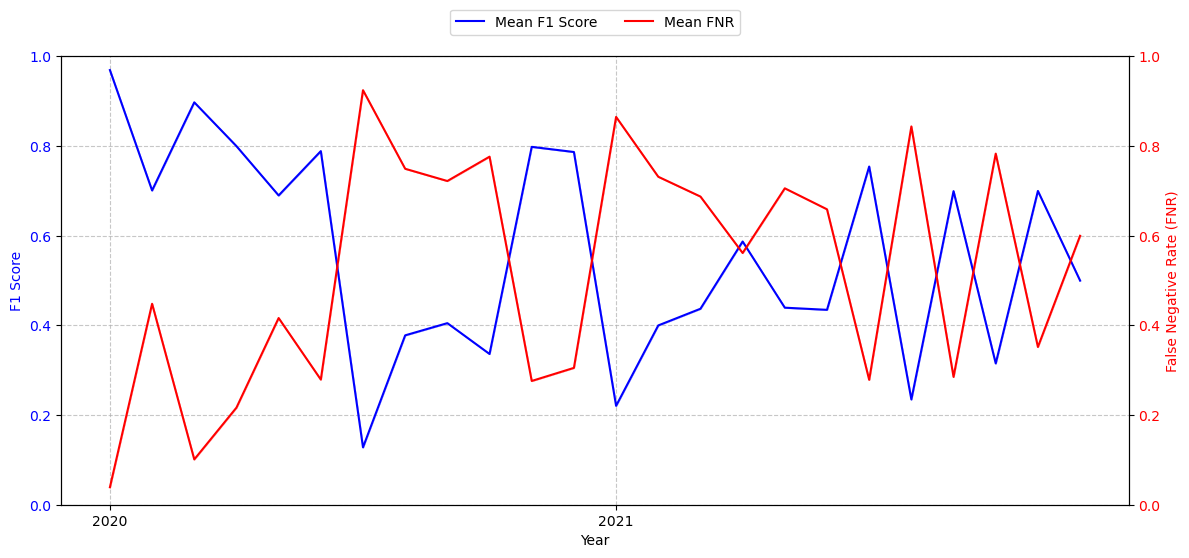

In [ ]:
pattern = "/home/mhaque3/myDir/active-learning/results_chen_baseline_andro/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-01_2021-12_cnt200_*.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
# pattern = "/home/mhaque3/myDir/active-learning/results_chen_al/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt200_*_metrices.csv"

csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")
print(f"Found {len(csv_files)} files")

# For per-month mean per run
f1_list = []
fnr_list = []
fpr_list = []
index_order = None

f1_s = []
fnr_s = []
fpr_s = []

for file in csv_files:
    df = pd.read_csv(file, delimiter='\t')
    group_col = 'month' if 'month' in df.columns else df.columns[0]
    grouped = df.groupby(group_col)

    f1 = grouped['F1'].mean()
    fnr = grouped['FNR'].mean()
    fpr = grouped['FPR'].mean()

    f1_s.append(f1.mean())
    fnr_s.append(fnr.mean())
    fpr_s.append(fpr.mean())

    if index_order is None:
        index_order = f1.index  # Save index order (e.g., months)

    f1_list.append(f1.values)
    fnr_list.append(fnr.values)
    fpr_list.append(fpr.values)

# Convert to arrays: shape (n_runs, n_months)
f1_array = np.array(f1_list)
fnr_array = np.array(fnr_list)
fpr_array = np.array(fpr_list)

# Mean and std across seeds for each month (axis=0 is seed)
mean_f1 = f1_array.mean(axis=0)
std_f1 = f1_array.std(axis=0)
mean_fnr = fnr_array.mean(axis=0)
std_fnr = fnr_array.std(axis=0)
mean_fpr = fpr_array.mean(axis=0)
std_fpr = fpr_array.std(axis=0)


## Means of mean f1, fnr, fpr
mean_f1s = np.mean(np.array(f1_s))
std_f1s = np.std(np.array(f1_s))
mean_fnrs = np.mean(np.array(fnr_s))
std_fnrs = np.std(np.array(fnr_s))
mean_fprs = np.mean(np.array(fpr_s))
std_fprs = np.std(np.array(fpr_s))


# Print overall mean ± std
print(f"Mean F1: {mean_f1s*100:.4f} ± {std_f1s*100:.4f}")
print(f"Mean FNR: {mean_fnrs*100:.4f} ± {std_fnrs*100:.4f}")
print(f"Mean FPR: {mean_fprs*100:.4f} ± {std_fprs*100:.4f}")

# Use Plotting function (Year-month)


# Call plotting
plot_f1_fnr(
    years=index_order,
    f1s=mean_f1,
    fnrs=mean_fnr,
    f1_std=std_f1,
    fnr_std=std_fnr,
    save_path="f1_fnr_chen_baseline_with_error_bands.png"
)


In [13]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
# chen baseline andro
pattern = "/home/mhaque3/myDir/active-learning/results_chen_baseline_andro/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-01_2021-12_cnt200_*.csv"
# pattern = "/home/mhaque3/myDir/active-learning/results_chen_baseline_andro/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-01_2021-12_cnt200_*.csv"
# chen-al androzoo for 400 budget
# pattern = "/home/mhaque3/myDir/active-learning/chen_al_andro_400_2020_7/gen_androzoo_cnt400_033_warm_lr0.001_sgd_step_0.5_e200_adam_wlr1e-05_we50_test_2020-07_2021-12_cnt400_*_scores.csv"
# chen-al androzoo baseline

all_files = sorted(glob.glob(pattern))

# ✅ Keep only files that do NOT contain extra suffixes like '_family.csv'
filtered_files = [f for f in all_files if not any(suffix in os.path.basename(f) for suffix in ['_family.csv', '_explanation.csv', 'stat.csv', '.log', '_sample.csv'])]

if not filtered_files:
  raise FileNotFoundError("No CSV files matched the given pattern.")
print(f"Found {len(filtered_files)} files")


f1_s = []
fnr_s = []
fpr_s = []
start_date = '2020-07'
for file in filtered_files:
    df = pd.read_csv(file, delimiter='\t')
    group_col = 'month' if 'month' in df.columns else df.columns[0]
    grouped = df.groupby(group_col)

    # Filter to include only rows on or after start_date
    if 'date' in df.columns:
        df = df[df['date'] >= start_date]
    
    f1_s.append(df['F1'].mean())
    print(f"Processing file: {file} → F1: {df['F1'].mean():.4f}")
    fnr_s.append(df['FNR'].mean())
    fpr_s.append(df['FPR'].mean())

## Means of mean f1, fnr, fpr
mean_f1s = np.mean(np.array(f1_s))
std_f1s = np.std(np.array(f1_s))
mean_fnrs = np.mean(np.array(fnr_s))
std_fnrs = np.std(np.array(fnr_s))
mean_fprs = np.mean(np.array(fpr_s))
std_fprs = np.std(np.array(fpr_s))


# Print overall mean ± std
print(f"Mean F1: {mean_f1s*100:.4f} ± {std_f1s*100:.4f}")
print(f"Mean FNR: {mean_fnrs*100:.4f} ± {std_fnrs*100:.4f}")
print(f"Mean FPR: {mean_fprs*100:.4f} ± {std_fprs*100:.4f}")

Found 4 files
Processing file: /home/mhaque3/myDir/active-learning/results_chen_baseline_andro/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-01_2021-12_cnt200_06.23-19.03.58.csv → F1: 0.4753
Processing file: /home/mhaque3/myDir/active-learning/results_chen_baseline_andro/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-01_2021-12_cnt200_06.23-19.04.36.csv → F1: 0.4689
Processing file: /home/mhaque3/myDir/active-learning/results_chen_baseline_andro/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-01_2021-12_cnt200_06.23-19.06.00.csv → F1: 0.4660
Processing file: /home/mhaque3/myDir/active-learning/results_chen_baseline_andro/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-01_2021-12_cnt200_06.23-21.22.15.csv → F1: 0.4895
Mean F1: 47.4940 ± 0.9069
Mean FNR: 61.2893 ± 0.4892
Mean FPR: 1.6522 ± 0.1884


In [8]:
path = "/home/mhaque3/myDir/active-learning/cade_androo_400_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2020-07_2021-12_cnt400_07.18-10.45.46_scores.csv"
path = "/home/mhaque3/myDir/active-learning/cade_andro_200_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2020-07_2021-12_cnt200_07.21-15.27.51.csv"
path = "/home/mhaque3/myDir/active-learning/cade_andro_100_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2020-07_2021-12_cnt100_07.21-06.30.29_scores.csv"
path = "/home/mhaque3/myDir/active-learning/cade_andro_50_7/cade_apigraph_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2020-07_2021-12_cnt50_07.20-16.15.55_scores.csv"
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]    
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Mean F1: 0.4813, Mean FNR: 0.6346, Mean FPR: 0.0054


### Results for multiple label ratio

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


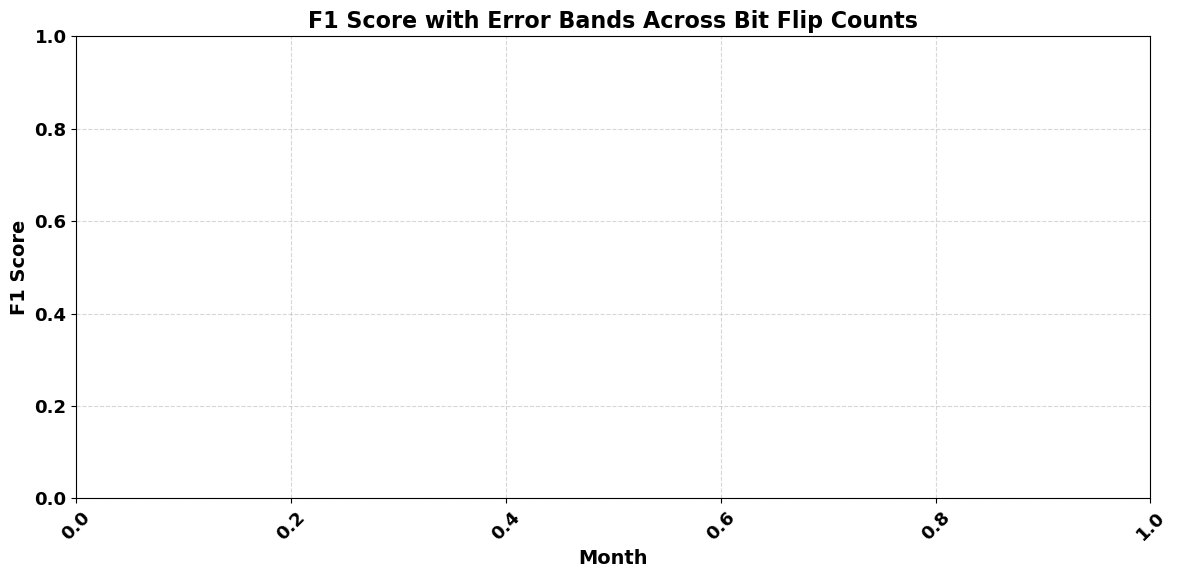

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re

# Set base path and pattern to match multiple bit flip values
base_path = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/results/baseline_2runs"
pattern = os.path.join(base_path, "fixmatch_wo_al_random_bit_flip_*_lbr_0.4_seed_*.csv")

# Collect all matching CSV files
csv_files = sorted(glob.glob(pattern))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")

# Group files by bit flip value
bit_flip_groups = {}
for file in csv_files:
    match = re.search(r'random_bit_flip_(\d+)_lbr_0.1_seed_\d+\.csv', os.path.basename(file))
    if match:
        n_bit = int(match.group(1))
        bit_flip_groups.setdefault(n_bit, []).append(file)

# Initialize plot
plt.figure(figsize=(12, 6))
plt.rcParams.update({
    "font.size": 14,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

# For each bit flip value, compute mean and std, and plot
for n_bit, files in sorted(bit_flip_groups.items()):
    all_dfs = [pd.read_csv(f) for f in files]
    merged_df = pd.concat(all_dfs)

    group_col = 'month' if 'month' in merged_df.columns else merged_df.columns[0]
    grouped = merged_df.groupby(group_col)

    mean_f1 = grouped['f1'].mean()
    std_f1 = grouped['f1'].std()

    # Plot with error band
    plt.plot(mean_f1.index, mean_f1.values, marker='o', label=f'Bit Flip {n_bit}')
    plt.fill_between(mean_f1.index, mean_f1 - std_f1, mean_f1 + std_f1, alpha=0.2)

plt.xlabel("Month")
plt.ylabel("F1 Score")
plt.title("F1 Score with Error Bands Across Bit Flip Counts")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("f1_score_by_bit_flip.png", dpi=300)
plt.show()


### SVM results

In [3]:
# for APIGraph dataset
path = "/home/mhaque3/myDir/active-learning/SVM_results/plain_apigraph_svmc0.01_CNT50_test_2013-07_2018-12_08.04-16.00.50.csv"
path = "/home/mhaque3/myDir/active-learning/SVM_results/plain_apigraph_svmc0.1_test_2013-07_2018-12_08.04-15.22.19.csv"
path = "/home/mhaque3/myDir/active-learning/SVM_results/plain_apigraph_svmc0.01_test_2013-07_2018-12_08.04-15.27.58.csv"

# For LAMDA dataset
# for 50 budget
path = "/home/mhaque3/myDir/active-learning/SVM_results/plain_apigraph_svmc0.01_CNT50_test_2014-07_2025-01_08.04-17.54.39.csv"
# for 400 budget
# path = "/home/mhaque3/myDir/active-learning/SVM_results/plain_apigraph_svmc0.01_CNT400_test_2014-07_2025-01_08.04-17.54.41.csv"

# for AndroZoo dataset
# for 50 budget
path = "/home/mhaque3/myDir/active-learning/SVM_results/plain_andro_svmc0.01_CNT50_test_2020-07_2021-12_08.04-16.00.55.csv"
# for 400 budget
path = "/home/mhaque3/myDir/active-learning/SVM_results/plain_andro_svmc0.01_CNT400_test_2020-07_2021-12_08.04-16.00.55.csv"


import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")



Mean F1: 0.7063, Mean FNR: 0.3815, Mean FPR: 0.0039


### Transcend APIGraph results

In [20]:
# transcend baseline
path = "/home/mhaque3/myDir/active-learning/transcend_baseline_api/cred_svmc0.1_cold_lr0.005_sgd_cosine_1_e20_test_2013-07_2018-12_cnt400_07.27-16.57.08.csv"

# Active learning for 50 budget
# path = "/home/mhaque3/myDir/active-learning/transcend_andro_50_7/cred_svmc0.1_cold_lr0.005_sgd_cosine_1_e20_test_2020-07_2021-12_cnt50_07.26-22.10.09.csv"

# Active learning for 400 budget
path = "/home/mhaque3/myDir/active-learning/transcend_andro_400_7/cred_svmc0.1_cold_lr0.005_sgd_cosine_1_e20_test_2020-07_2021-12_cnt400_07.27-00.25.44.csv"


import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")


Mean F1: 0.4397, Mean FNR: 0.6541, Mean FPR: 0.0098


### Transcend AndroZoo Results :

In [7]:
# path = "/home/mhaque3/myDir/active-learning/transcend_andro_50_7/cred_svmc0.1_cold_lr0.005_sgd_cosine_1_e20_test_2020-07_2021-12_cnt50_07.26-22.10.09.csv"
path = "/home/mhaque3/myDir/active-learning/transcend_andro_400_7/cred_svmc0.1_cold_lr0.005_sgd_cosine_1_e20_test_2020-07_2021-12_cnt400_07.27-00.25.44.csv"

# transcend androzoo baseline:
path = "/home/mhaque3/myDir/active-learning/transcend_baseline_andro/cred_svmc0.1_cold_lr0.005_sgd_cosine_1_e20_test_2020-07_2021-12_cnt400_07.27-16.46.21.csv"

import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Mean F1: 0.2930, Mean FNR: 0.7824, Mean FPR: 0.0126


In [4]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Set path pattern
# Transcend Androzoo for 50 budget
pattern = "/home/mhaque3/myDir/active-learning/transcend_andro_50_7/cred_svmc0.1_cold_lr0.005_sgd_cosine_1_e20_test_2020-07_2021-12_cnt50_07.26-22.10.09.csv"

# transcend Androzoo for 100 budget

# transcend Androzoo for 200 budget

# transcend Androzoo for 400 budget
# pattern = "/home/mhaque3/myDir/active-learning/transcend_andro_400_7/cred_svmc0.1_cold_lr0.005_sgd_cosine_1_e20_test_2020-07_2021-12_cnt400_07.27-00.25.44.csv"

all_files = sorted(glob.glob(pattern))

# ✅ Keep only files that do NOT contain extra suffixes like '_family.csv'
filtered_files = [f for f in all_files if not any(suffix in os.path.basename(f) for suffix in ['_family.csv', '_explanation.csv', 'stat.csv', '.log', '_sample.csv'])]

if not filtered_files:
  raise FileNotFoundError("No CSV files matched the given pattern.")
print(f"Found {len(filtered_files)} files")


f1_s = []
fnr_s = []
fpr_s = []
start_date = '2020-07'
for file in filtered_files:
    df = pd.read_csv(file, delimiter='\t')
    group_col = 'month' if 'month' in df.columns else df.columns[0]
    grouped = df.groupby(group_col)

    # Filter to include only rows on or after start_date
    if 'date' in df.columns:
        df = df[df['date'] >= start_date]
    
    f1_s.append(df['F1'].mean())
    print(f"Processing file: {file} → F1: {df['F1'].mean():.4f}")
    fnr_s.append(df['FNR'].mean())
    fpr_s.append(df['FPR'].mean())

## Means of mean f1, fnr, fpr
mean_f1s = np.mean(np.array(f1_s))
std_f1s = np.std(np.array(f1_s))
mean_fnrs = np.mean(np.array(fnr_s))
std_fnrs = np.std(np.array(fnr_s))
mean_fprs = np.mean(np.array(fpr_s))
std_fprs = np.std(np.array(fpr_s))


# Print overall mean ± std
print(f"Mean F1: {mean_f1s*100:.4f} ± {std_f1s*100:.4f}")
print(f"Mean FNR: {mean_fnrs*100:.4f} ± {std_fnrs*100:.4f}")
print(f"Mean FPR: {mean_fprs*100:.4f} ± {std_fprs*100:.4f}")


# path = "/content/chen_base/LAMDA_TEST_cnt50_088_warm_lr0.003_sgd_step_0.95_e200_adam_wlr0.00015_we70_test_2014-07_2025-01_cnt50_07.26-05.07.57.csv"
# df = pd.read_csv(path, delimiter="\t")
# df = df[df["date"] != "2017-09"]  # Remove the row that has only two benign samples (if included, it can generate NaN)
# years = df["date"]
# f1s = df["F1"]
# fnrs = df["FNR"]
# fprs = df["FPR"]
# print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Found 1 files
Processing file: /home/mhaque3/myDir/active-learning/transcend_andro_50_7/cred_svmc0.1_cold_lr0.005_sgd_cosine_1_e20_test_2020-07_2021-12_cnt50_07.26-22.10.09.csv → F1: 0.3572
Mean F1: 35.7217 ± 0.0000
Mean FNR: 72.4061 ± 0.0000
Mean FPR: 1.6944 ± 0.0000


## Extra

In [3]:
path = "/home/mhaque3/myDir/active-learning/results_ours/gen_apigraph_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt400.csv"
path = "/home/mhaque3/myDir/active-learning/results_ours/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt200.csv"
import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Mean F1: 0.9078, Mean FNR: 0.1240, Mean FPR: 0.0056


In [47]:
path = "/home/mhaque3/myDir/active-learning/results_chen_baseline/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt200_06.21-02.11.36_metrices.csv"
import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Mean F1: 0.6412, Mean FNR: 0.4436, Mean FPR: 0.0148


In [48]:
# path = "/home/mhaque3/myDir/active-learning/results_chen_baseline/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt200_06.21-02.11.36_metrices.csv"
path = "/home/mhaque3/myDir/active-learning/results_chen_baseline/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt200_06.21-02.11.06.csv"
import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Mean F1: 0.6581, Mean FNR: 0.4093, Mean FPR: 0.0187


In [ ]:
path = "/home/mhaque3/myDir/active-learning/chen_al_andro_400_2020_7/gen_apigraph_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt400_07.16-23.39.53.csv"
path = "/home/mhaque3/myDir/active-learning/chen_al_andro_400_2020_7/gen_apigraph_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt400_07.16-11.02.26.csv"
# path = "/home/mhaque3/myDir/active-learning/chen_al_andro_400_2020_7/gen_apigraph_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt400_07.16-11.01.55.csv"
import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Mean F1: 0.7789, Mean FNR: 0.2875, Mean FPR: 0.0054


In [49]:
f1 = np.array([0.6581, 0.6492, 0.6277, 0.6360, 0.6260])
print(f1.mean())
print(f1.std())

0.6394
0.01243977491757789


In [1]:
path = "/home/mhaque3/myDir/active-learning/results_chen_al_andro/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-01_2021-12_cnt200_06.23-19.08.42.csv"
import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Mean F1: 0.8071, Mean FNR: 0.2582, Mean FPR: 0.0051


### Chen-AL on APIGraph

In [1]:
path = "/home/mhaque3/myDir/active-learning/results_chen_al/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2013-01_2018-12_cnt200_06.21-02.16.44_metrices.csv"
import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Mean F1: 0.9139, Mean FNR: 0.1193, Mean FPR: 0.0048


### Chen-Al on Androzoo

In [4]:
# for 50 budget
path = "/home/mhaque3/myDir/active-learning/chen_al_andro_50_7/gen_andro_cnt50_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt50_07.19-09.04.29_scores.csv"
path = "/home/mhaque3/myDir/active-learning/chen_al_andro_50_7/gen_andro_cnt50_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt50_07.19-12.32.18_scores.csv"
path = "/home/mhaque3/myDir/active-learning/chen_al_andro_50_7/gen_andro_cnt50_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt50_07.19-15.46.00_scores.csv"

# for 100 budget
path = "/home/mhaque3/myDir/active-learning/chen_al_andro_100_7/gen_andro_cnt100_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-07_2021-12_cnt100_07.19-18.50.00_scores.csv"

import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Mean F1: 0.7025, Mean FNR: 0.3786, Mean FPR: 0.0055


### Chen-AL on LAMDA 

In [5]:
# Chen-LAMDA 400 budget
path = "/home/shared-datasets/Feature_extraction/active-learning/chen_al_LAMDA_400_7/LAMDA_TEST_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2014-07_2025-01_cnt400_07.23-01.29.47.csv"
# path = "/home/shared-datasets/Feature_extraction/active-learning/chen_al_LAMDA_400_7/LAMDA_TEST_cnt400_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2014-07_2025-01_cnt400_07.23-01.29.47.csv"
import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Mean F1: 0.3666, Mean FNR: 0.0341, Mean FPR: 0.9431


### Cade on LAMDA

In [3]:
path = "/home/shared-datasets/Feature_extraction/active-learning/cade_results/cade_LAMDA_127_warm_lr0.001_adam_cosine_1_e2_wlr5e-05_we1_mwlr5e-05_mwe1_test_2014-01_2025-01_cnt400.csv"
path = "/home/shared-datasets/Feature_extraction/active-learning/cade_LAMDA_400_7/cade_LAMDA_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2014-07_2025-01_cnt400_07.23-17.27.19.csv"
path = "/home/shared-datasets/Feature_extraction/active-learning/cade_LAMDA_400_7/cade_LAMDA_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2014-07_2025-01_cnt400_07.24-02.32.25.csv"
# path = "/home/shared-datasets/Feature_extraction/active-learning/cade_LAMDA_400_7/cade_LAMDA_127_warm_lr0.001_adam_cosine_1_e2_wlr5e-05_we1_mwlr5e-05_mwe1_test_2014-07_2025-01_cnt400.csv"
# path = "/home/shared-datasets/Feature_extraction/active-learning/cade_LAMDA_400_7/cade_LAMDA_127_warm_lr0.001_adam_cosine_1_e250_wlr5e-05_we50_mwlr5e-05_mwe50_test_2014-07_2025-01_cnt400_07.23-17.27.19.csv"
import pandas as pd
df = pd.read_csv(path, delimiter="\t")
years = df["date"]
f1s = df["F1"]
fnrs = df["FNR"]
fprs = df["FPR"]
print(f"Mean F1: {f1s.mean():.4f}, Mean FNR: {fnrs.mean():.4f}, Mean FPR: {fprs.mean():.4f}")

Mean F1: 0.4535, Mean FNR: 0.5924, Mean FPR: 0.1011


## Extract information log files

In [9]:
import re

# Path to your log file
log_file_path = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/logs_al_uc/fixmatch_w_al_random_bit_flip_11_lbr_0.4_seed_12.log"

# Pattern to match metric lines
pattern = re.compile(
    r"Year \d{4}-\d{2}: Acc=([\d.]+), Prec=([\d.]+), Rec=([\d.]+), F1=([\d.]+), FNR=([\d.]+), FPR=([\d.]+), ROC-AUC=([\d.]+), PR-AUC=([\d.]+)"
)

# Lists to hold the extracted values
acc_list, f1_list, fnr_list, fpr_list = [], [], [], []

# Read and parse the log file
with open(log_file_path, "r") as f:
    for line in f:
        match = pattern.search(line)
        if match:
            acc = float(match.group(1))
            f1 = float(match.group(4))
            fnr = float(match.group(5))
            fpr = float(match.group(6))

            acc_list.append(acc)
            f1_list.append(f1)
            fnr_list.append(fnr)
            fpr_list.append(fpr)

# Compute averages
avg_acc = sum(acc_list) / len(acc_list)
avg_f1 = sum(f1_list) / len(f1_list)
avg_fnr = sum(fnr_list) / len(fnr_list)
avg_fpr = sum(fpr_list) / len(fpr_list)

# Print results
print(f"Average Accuracy: {avg_acc:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")
print(f"Average FNR: {avg_fnr:.4f}")
print(f"Average FPR: {avg_fpr:.4f}")


Average Accuracy: 0.9820
Average F1 Score: 0.8988
Average FNR: 0.1439
Average FPR: 0.0048


In [7]:
path = "/home/mhaque3/myDir/active-learning/results_chen_al_andro/gen_apigraph_cnt200_088_warm_lr0.003_sgd_step_0.95_e250_adam_wlr0.00015_we100_test_2020-01_2021-12_cnt200_06.23-19.08.42.csv"
import datetime as dt
start = dt.datetime.strptime("2014-07", '%Y-%m')

print(f"Start date: {start}")
cur_month_str = start.strftime('%Y-%m')
print(f"Current month string: {cur_month_str}")

Start date: 2014-07-01 00:00:00
Current month string: 2014-07


### Pytorch profiler for runtime analysis

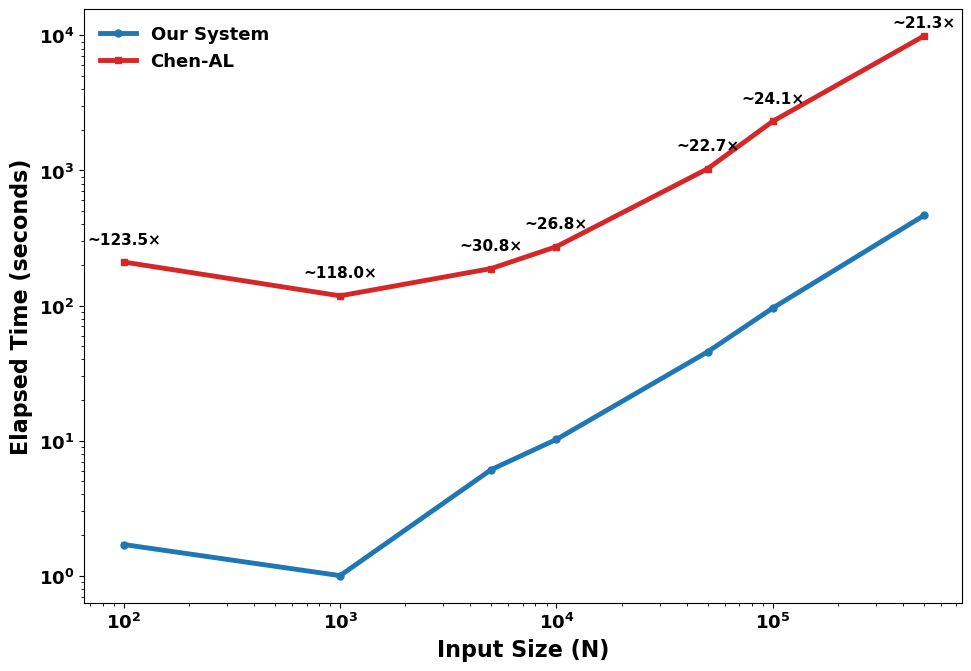

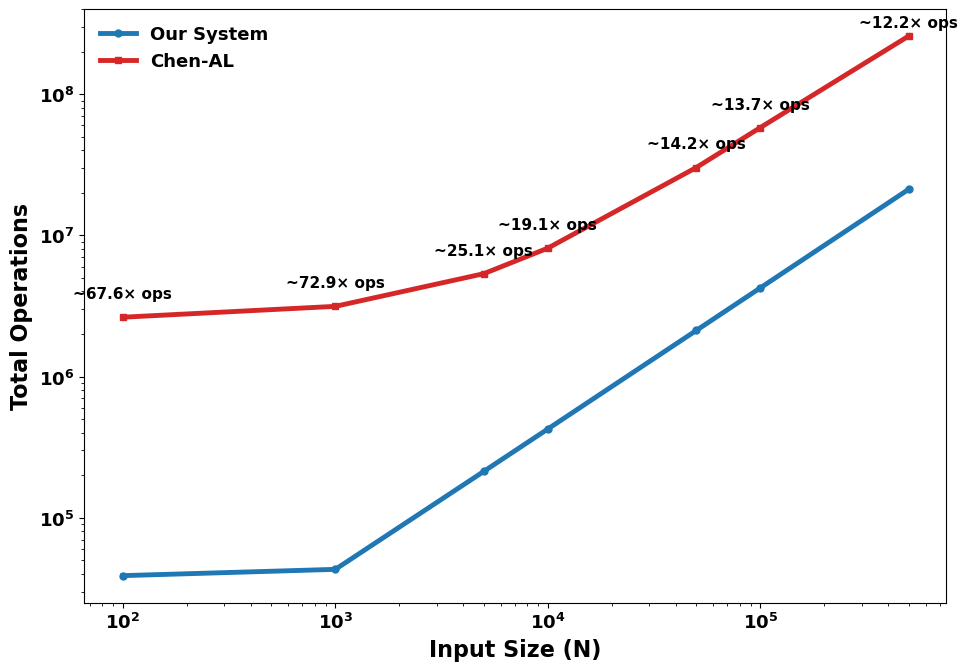

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Global font settings
plt.rcParams.update({
    "font.size": 16,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})
# Input sizes and performance data
n_values = np.array([100, 1000, 5000, 10000, 50000, 100000, 500000])
our_times = np.array([1.7, 1.0, 6.1, 10.2, 45.4, 95.8, 464.4])
chen_times = np.array([210, 118, 188, 273, 1030, 2312, 9909])
our_ops = np.array([38900, 43100, 213000, 425000, 2120000, 4240000, 21200000])
chen_ops = np.array([2630000, 3140000, 5350000, 8110000, 30200000, 57900000, 257900000])

# Speedup calculations
speedup_time = chen_times / our_times
speedup_ops = chen_ops / our_ops

# ---------------- Runtime Plot ----------------
plt.figure(figsize=(10, 7))
plt.plot(n_values, our_times, marker='o', markersize=5, linewidth=3.5, label='Our System', color="#1f77b4")
plt.plot(n_values, chen_times, marker='s', markersize=5, linewidth=3.5, label='Chen-AL', color="#d62728")


for i in range(len(n_values)):
    x = n_values[i]
    y = max(our_times[i], chen_times[i])
    offset = 1.1 if x == 500000 else 1.3
    plt.text(x, y * offset, f"~{speedup_time[i]:.1f}×", fontsize=11, ha='center', va='bottom')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size (N)')
plt.ylabel('Elapsed Time (seconds)')
plt.legend()
# plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xlim(right=n_values[-1] * 1.5)
plt.tight_layout()
plt.savefig('runtime_complexity_comparison.png', dpi=300)
plt.show()


# ---------------- Operation Plot ----------------
plt.figure(figsize=(10, 7))
plt.plot(n_values, our_ops, marker='o', markersize=5, linewidth=3.5, label='Our System', color="#1f77b4")
plt.plot(n_values, chen_ops, marker='s', markersize=5, linewidth=3.5, label='Chen-AL', color="#d62728")


for i in range(len(n_values)):
    x = n_values[i]
    y = max(our_ops[i], chen_ops[i])
    offset = 1.1 if x == 500000 else 1.3
    plt.text(x, y * offset, f"~{speedup_ops[i]:.1f}× ops", fontsize=11, ha='center', va='bottom')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size (N)')
plt.ylabel('Total Operations')
plt.legend()
# plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xlim(right=n_values[-1] * 1.5)
plt.tight_layout()
plt.savefig('operation_complexity_comparison.png', dpi=300)
plt.show()



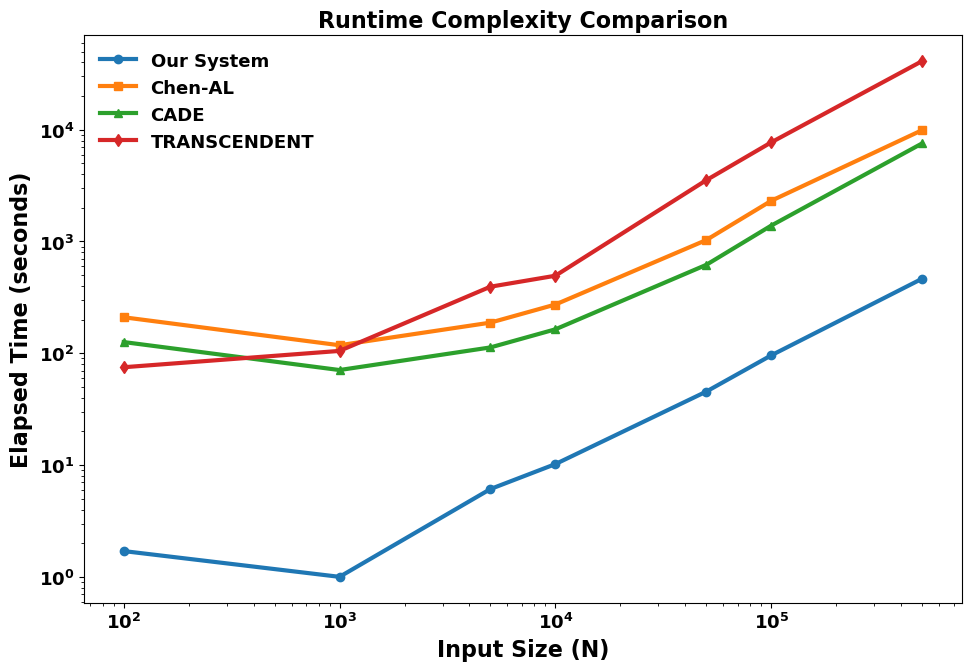

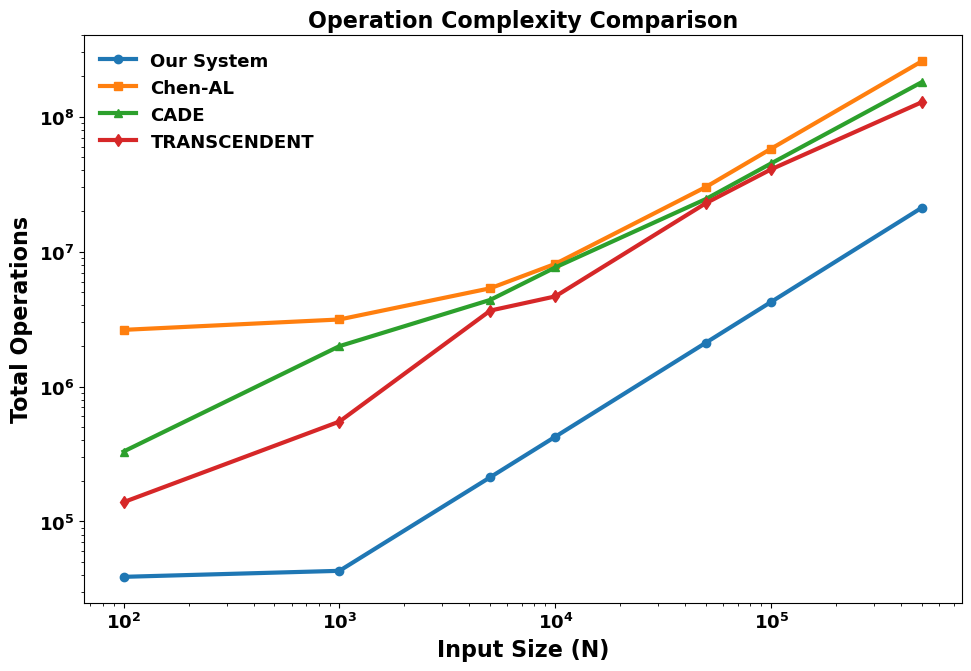

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Input sizes
n_values = np.array([100, 1000, 5000, 10000, 50000, 100000, 500000])

# Time data (in seconds)
our_times = np.array([1.7, 1.0, 6.1, 10.2, 45.4, 95.8, 464.4])
chen_times = np.array([210, 118, 188, 273, 1030, 2312, 9909])
cade_times = np.array([126.0, 70.8, 112.8, 163.8, 618.0, 1387.2, 7540.8])
transcendent_times = np.array([75.0, 105.0, 394.0, 494.0, 3533.0, 7705.5, 41085.5])

# Operations data
our_ops = np.array([38900, 43100, 213000, 425000, 2120000, 4240000, 21200000])
chen_ops = np.array([2630000, 3140000, 5350000, 8110000, 30200000, 57900000, 257900000])
cade_ops = np.array([329948, 1992434, 4388125, 7632739, 24589649, 45035786, 180604882])
transcendent_ops = np.array([139102, 550278, 3655693, 4655693, 22906106, 40719126, 128223286])

# Global font and plot settings
plt.rcParams.update({
    "font.size": 16,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "legend.frameon": False
})

# ----- Runtime Complexity Plot -----
LW = 3.5
plt.figure(figsize=(10, 7))
plt.plot(n_values, our_times, marker='o', linewidth=LW, label='Our System')
plt.plot(n_values, chen_times, marker='s', linewidth=LW, label='Chen-AL')
plt.plot(n_values, cade_times, marker='^', linewidth=LW, label='CADE')
plt.plot(n_values, transcendent_times, marker='d', linewidth=LW, label='TRANSCENDENT')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size (N)')
plt.ylabel('Elapsed Time (seconds)')
# plt.title('Runtime Complexity Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('runtime_all_systems.png', dpi=300)
plt.show()

# ----- Operation Complexity Plot -----
plt.figure(figsize=(10, 7))
plt.plot(n_values, our_ops, marker='o', linewidth=LW, label='Our System')
plt.plot(n_values, chen_ops, marker='s', linewidth=LW, label='Chen-AL')
plt.plot(n_values, cade_ops, marker='^', linewidth=LW, label='CADE')
plt.plot(n_values, transcendent_ops, marker='d', linewidth=LW, label='TRANSCENDENT')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Input Size (N)')
plt.ylabel('Total Operations')
# plt.title('Operation Complexity Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('operation_all_systems.png', dpi=300)
plt.show()


In [7]:
import pandas as pd
from torch.utils.data import TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.profiler

# 1. Define a simple MLP
class MLP(nn.Module):
    def __init__(self, input_dim=100, hidden_dim=256, output_dim=10):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        return self.net(x)

# 2. Create a training function with profiler support
def train_one_epoch(model, loader, optimizer, loss_fn, device, prof=None):
    model.train()
    for step, (X_batch, y_batch) in enumerate(loader):
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)

        optimizer.zero_grad()
        output = model(X_batch)
        loss = loss_fn(output, y_batch)
        loss.backward()
        optimizer.step()

        if prof:
            prof.step()  # Tell profiler to record this step


def main():
    # Configs
    input_dim = 100
    num_classes = 10
    batch_size = 128
    num_samples = 5000
    device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

    # 4. Create dummy dataset
    X = torch.randn(num_samples, input_dim)
    y = torch.randint(0, num_classes, (num_samples,))
    dataset = TensorDataset(X, y)
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # 5. Initialize model, loss, optimizer
    model = MLP(input_dim=input_dim, output_dim=num_classes).to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    print(f"Train loader length: {len(train_loader)} batches")
    # 6. Profiler
    with torch.profiler.profile(
        schedule=torch.profiler.schedule(wait=0, warmup=0, active=len(train_loader), repeat=1),
        activities=[torch.profiler.ProfilerActivity.CPU, torch.profiler.ProfilerActivity.CUDA],
        record_shapes=True,
        with_stack=True
    ) as prof:
        train_one_epoch(model, train_loader, optimizer, loss_fn, device, prof=prof)

    print("\n✅ Profiler run completed. Saving CSV...")

    # 7. Convert profiler output to a pandas DataFrame
    events = prof.key_averages().table(sort_by="self_cuda_time_total", row_limit=100)
    # print(events)  # Optional: see output in terminal

    # 8. Save as CSV
    # rows = []
    # for evt in prof.key_averages():
    #     row = {
    #         "Name": evt.key,
    #         "CPU time total (us)": evt.cpu_time_total,
    #         # "CUDA time total (us)": evt.cuda_time_total,
    #         "CPU time avg (us)": evt.cpu_time_total / evt.count if evt.count else 0,
    #         "CUDA time avg (us)": evt.cuda_time_total / evt.count if evt.count else 0,
    #         "Count": evt.count,
    #     }
    #     rows.append(row)

    # df = pd.DataFrame(rows)
    # df.sort_values("CUDA time total (us)", ascending=False).to_csv("profiler_summary.csv", index=False)
    # Compute aggregate metrics
    total_cpu_time_us = sum(evt.cpu_time_total for evt in prof.key_averages())
    total_cuda_time_us = sum(evt.cuda_time for evt in prof.key_averages())
    # for evt in prof.key_averages():
    #     # Print each event's key and its CPU time total        
    #     print(f"{evt}")
    #     break
    total_ops = sum(evt.count for evt in prof.key_averages())




    print(f"\n🧠 Total CPU time: {total_cpu_time_us / 1e6:.3f} seconds")
    print(f"🚀 Total CUDA (GPU) time: {total_cuda_time_us / 1e6:.3f} seconds")
    print(f"🔢 Total operations recorded: {total_ops:,}\n")

    
    print("📁 Saved profiler output to profiler_summary.csv\n")

if __name__ == "__main__":
    main()



Train loader length: 40 batches


/home/mhaque3/anaconda3/envs/apkencoder/lib/python3.10/site-packages/torch/profiler/profiler.py:497: UserWarning: Profiler won't be using warmup, this can skew profiler results
  warn("Profiler won't be using warmup, this can skew profiler results")



✅ Profiler run completed. Saving CSV...


/tmp/ipykernel_2685435/197216637.py:90: FutureWarning: `cuda_time` is deprecated, please use `device_time` instead.
  total_cuda_time_us = sum(evt.cuda_time for evt in prof.key_averages())



🧠 Total CPU time: 2.520 seconds
🚀 Total CUDA (GPU) time: 0.011 seconds
🔢 Total operations recorded: 39,334

📁 Saved profiler output to profiler_summary.csv



In [6]:
path = "/home/mhaque3/myDir/data/gen_apigraph_drebin"
import os
import numpy as np
from sklearn.utils import shuffle

# Load the full dataset
input_path = f"{path}/2012-01to2012-12_selected.npz"
data = np.load(input_path, allow_pickle=True)

X_train = data['X_train']
y = data['y_train']
y_train_family = data['y_mal_family']

ben_len = X_train.shape[0] - y_train_family.shape[0]
y_ben_family = np.full(ben_len, 'benign')
y_train_family = np.concatenate((y_train_family, y_ben_family), axis=0)


# Sample sizes you want
sample_sizes = [10, 100, 1000, 5000, 10000, 20000, 30000]

# Shuffle the dataset once (same order used for all sample sizes)
X, y, y_family = shuffle(X_train, y, y_train_family, random_state=42)

# Create and save each subset
for size in sample_sizes:
    if size > len(X):
        print(f"⚠️ Skipping size {size}: not enough samples (only {len(X)} available)")
        continue

    X_subset = X[:size]
    y_subset = y[:size]
    y_family_subset = y_family[:size]
    new_path = "/home/mhaque3/myDir/data/gen_apigraph_drebin_multi"
    out_dir = str(size)
    os.makedirs(os.path.join(new_path, out_dir), exist_ok=True)

    out_path = os.path.join(new_path, out_dir, "2012-01to2012-12_selected.npz")
    np.savez_compressed(out_path,
                        X_train=X_subset,
                        y_train=y_subset,
                        y_mal_family=y_family_subset)

    print(f"✅ Saved {size} samples to {out_path}")


✅ Saved 10 samples to /home/mhaque3/myDir/data/gen_apigraph_drebin_multi/10/2012-01to2012-12_selected.npz
✅ Saved 100 samples to /home/mhaque3/myDir/data/gen_apigraph_drebin_multi/100/2012-01to2012-12_selected.npz
✅ Saved 1000 samples to /home/mhaque3/myDir/data/gen_apigraph_drebin_multi/1000/2012-01to2012-12_selected.npz
✅ Saved 5000 samples to /home/mhaque3/myDir/data/gen_apigraph_drebin_multi/5000/2012-01to2012-12_selected.npz
✅ Saved 10000 samples to /home/mhaque3/myDir/data/gen_apigraph_drebin_multi/10000/2012-01to2012-12_selected.npz
✅ Saved 20000 samples to /home/mhaque3/myDir/data/gen_apigraph_drebin_multi/20000/2012-01to2012-12_selected.npz
✅ Saved 30000 samples to /home/mhaque3/myDir/data/gen_apigraph_drebin_multi/30000/2012-01to2012-12_selected.npz


In [1]:
path = "/home/mhaque3/myDir/data/gen_apigraph_drebin"
import os
import numpy as np
from sklearn.utils import shuffle, resample

# Load dataset
input_path = f"{path}/2012-01to2012-12_selected.npz"
data = np.load(input_path, allow_pickle=True)

X_train = data['X_train']
y_train = data['y_train']
y_mal_family = data['y_mal_family']

# Add benign family labels
ben_len = X_train.shape[0] - y_mal_family.shape[0]
y_ben_family = np.full(ben_len, 'benign', dtype=object)
y_train_family = np.concatenate((y_mal_family, y_ben_family), axis=0)

# Shuffle once
X_train, y_train, y_train_family = shuffle(X_train, y_train, y_train_family, random_state=42)

# Define sample sizes (including those requiring upsampling)
sample_sizes = [50000, 100000, 500000, 1000000]
total_available = X_train.shape[0]

print(f"🔎 Available samples: {total_available}")

for size in sample_sizes:
    if size <= total_available:
        # Downsample directly
        X_sub = X_train[:size]
        y_sub = y_train[:size]
        y_family_sub = y_train_family[:size]
        print(f"✅ Downsampled: {size}")
    else:
        # Upsample with replacement
        X_sub, y_sub, y_family_sub = resample(
            X_train, y_train, y_train_family,
            replace=True,
            n_samples=size,
            random_state=42
        )
        print(f"🔁 Upsampled to: {size}")

    # Save to folder
    new_path = "/home/mhaque3/myDir/data/gen_apigraph_drebin_multi"
    out_dir = str(size)
    os.makedirs(os.path.join(new_path, out_dir), exist_ok=True)

    out_path = os.path.join(new_path, out_dir, "2012-01to2012-12_selected.npz")
    np.savez_compressed(out_path,
                        X_train=X_sub,
                        y_train=y_sub,
                        y_mal_family=y_family_sub)

    print(f"📁 Saved to: {out_path}")


🔎 Available samples: 30533
🔁 Upsampled to: 50000
📁 Saved to: /home/mhaque3/myDir/data/gen_apigraph_drebin_multi/50000/2012-01to2012-12_selected.npz
🔁 Upsampled to: 100000
📁 Saved to: /home/mhaque3/myDir/data/gen_apigraph_drebin_multi/100000/2012-01to2012-12_selected.npz
🔁 Upsampled to: 500000
📁 Saved to: /home/mhaque3/myDir/data/gen_apigraph_drebin_multi/500000/2012-01to2012-12_selected.npz
🔁 Upsampled to: 1000000
📁 Saved to: /home/mhaque3/myDir/data/gen_apigraph_drebin_multi/1000000/2012-01to2012-12_selected.npz


## Misclassified Malware Explanation 

In [5]:
path = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/analysis2/analysis_misclassified_2013_1.csv"
import pandas as pd
df = pd.read_csv(path)
df.head()
# need to know which samples are misclassified but has high confidence 
df[df['misclassified'] == 1]




,true_label,pred_label,confidence,misclassified,d_to_malware_centroid,d_to_benign_centroid,centroid_margin,d_to_nearest_labeled,nearest_labeled_class
14,1,0,0.999359,1,10.094765,5.462814,4.631950,1.854725,0
17,1,0,0.998932,1,10.017241,2.707479,7.309762,1.817033,0
98,1,0,0.997602,1,9.260498,3.129130,6.131369,1.133926,0
128,1,0,0.615614,1,7.842308,4.012647,3.829661,2.017267,0
158,1,0,0.999732,1,10.549043,2.199708,8.349335,1.250816,0
...,...,...,...,...,...,...,...,...,...
4546,0,1,0.982913,1,5.508282,6.257640,0.749358,1.142301,1
4639,0,1,0.913523,1,6.489784,5.304019,1.185765,1.454611,1
4653,0,1,0.992375,1,5.119096,6.699127,1.580031,0.881673,1
4760,0,1,0.999981,1,3.260837,10.913576,7.652740,1.319717,1


In [3]:
len(df[df['misclassified'] == 1])

65

In [6]:
path = "/home/mhaque3/myDir/SSL-malware/baseline_experiments/analysis2/analysis_misclassified_*_*.csv"
import glob
import pandas as pd
# Collect all matching CSV files
csv_files = sorted(glob.glob(path))
if not csv_files:
    raise FileNotFoundError("No CSV files matched the given pattern.")  
# Read and aggregate by 'month' or 'year_month' column
all_dfs = [pd.read_csv(file) for file in csv_files]
merged_df = pd.concat(all_dfs)



In [11]:
len(merged_df[merged_df['misclassified']==1])

13651

In [4]:
# Misclassified high-confidence malware
malware_mis_high_conf = merged_df[
    (merged_df['true_label'] == 0) &
    (merged_df['misclassified']) &
    (merged_df['confidence'] >= 0.99)
]
print(len(malware_mis_high_conf))
malware_mis_high_conf.head()



395


,true_label,pred_label,confidence,misclassified,d_to_malware_centroid,d_to_benign_centroid,centroid_margin,d_to_nearest_labeled,nearest_labeled_class
533,0,1,0.996655,1,4.010119,7.069682,3.059563,1.642944,1
869,0,1,0.993831,1,5.353422,7.166450,1.813028,1.214181,1
914,0,1,0.990292,1,4.913765,6.661160,1.747395,0.863515,1
1072,0,1,0.998953,1,3.948908,7.149361,3.200453,1.327464,1
2467,0,1,0.999981,1,3.260837,10.913576,7.652740,1.319717,1


In [8]:
# Misclassified high-confidence malware
malware_mis_high_conf = merged_df[
    (merged_df['true_label'] == 0) &
    (merged_df['misclassified']) &
    (merged_df['confidence'] >= 0.90)
]
print(len(malware_mis_high_conf))
malware_mis_high_conf.tail()



1190


,true_label,pred_label,confidence,misclassified,d_to_malware_centroid,d_to_benign_centroid,centroid_margin,d_to_nearest_labeled,nearest_labeled_class
4115,0,1,0.958900,1,6.174957,5.828556,0.346401,1.278377,1
4120,0,1,0.903943,1,6.795373,5.528281,1.267092,1.724822,1
4146,0,1,0.999270,1,7.203994,7.380680,0.176686,3.148848,1
4611,0,1,0.961489,1,5.336823,5.687546,0.350723,2.166939,1
4651,0,1,0.952313,1,6.992065,4.965609,2.026457,1.776830,1


In [13]:
# Misclassified high-confidence malware
malware_mis_high_conf = merged_df[
    (merged_df['true_label'] == 1) &
    (merged_df['misclassified'])
]
print(len(malware_mis_high_conf))
malware_mis_high_conf.head()



11365


,true_label,pred_label,confidence,misclassified,d_to_malware_centroid,d_to_benign_centroid,centroid_margin,d_to_nearest_labeled,nearest_labeled_class
14,1,0,0.999359,1,10.094765,5.462814,4.631950,1.854725,0
17,1,0,0.998932,1,10.017241,2.707479,7.309762,1.817033,0
98,1,0,0.997602,1,9.260498,3.129130,6.131369,1.133926,0
128,1,0,0.615614,1,7.842308,4.012647,3.829661,2.017267,0
158,1,0,0.999732,1,10.549043,2.199708,8.349335,1.250816,0


### High confidence samples can be misclassified 

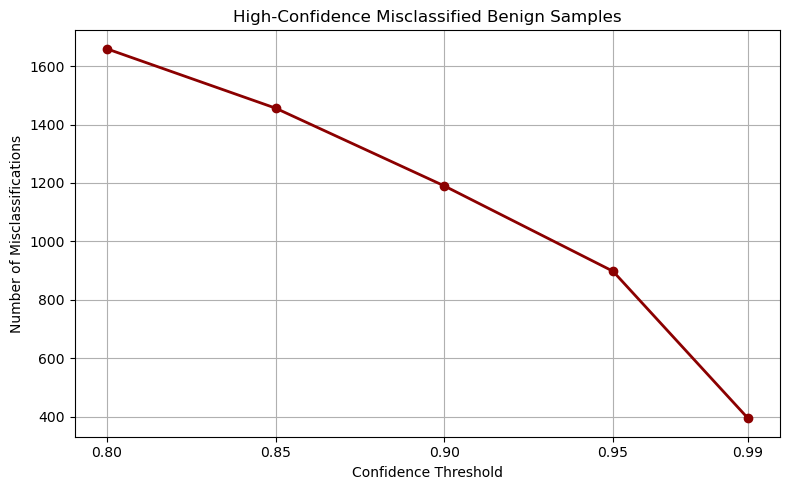

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Confidence thresholds to evaluate
thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]
misclassified_counts = []

# Compute number of benign samples misclassified with confidence >= threshold
for thresh in thresholds:
    count = merged_df[
        (merged_df['true_label'] == 0) &
        (merged_df['misclassified']) &
        (merged_df['confidence'] >= thresh)
    ].shape[0]
    misclassified_counts.append(count)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(thresholds, misclassified_counts, marker='o', color='darkred', linewidth=2)
plt.title("High-Confidence Misclassified benign Samples")
plt.xlabel("Confidence Threshold")
plt.ylabel("Number of Misclassifications")
plt.grid(True)
plt.xticks(thresholds)
plt.tight_layout()
plt.show()


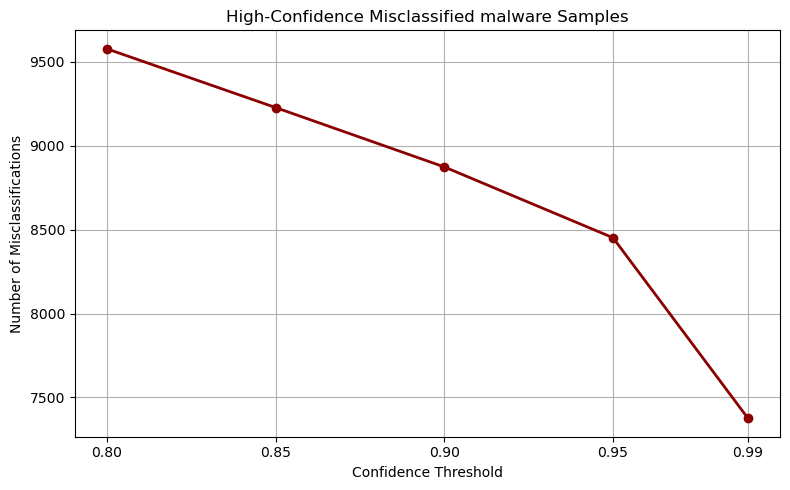

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Confidence thresholds to evaluate
thresholds = [0.80, 0.85, 0.90, 0.95, 0.99]
misclassified_counts = []

# Compute number of benign samples misclassified with confidence >= threshold
for thresh in thresholds:
    count = merged_df[
        (merged_df['true_label'] == 1) &
        (merged_df['misclassified']) &
        (merged_df['confidence'] >= thresh)
    ].shape[0]
    misclassified_counts.append(count)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(thresholds, misclassified_counts, marker='o', color='darkred', linewidth=2)
plt.title("High-Confidence Misclassified malware Samples")
plt.xlabel("Confidence Threshold")
plt.ylabel("Number of Misclassifications")
plt.grid(True)
plt.xticks(thresholds)
plt.tight_layout()
plt.show()


### Low confident correctly classified samples

In [15]:
threshold = 0.7

# Filter correctly classified and low-confidence samples
low_conf_correct = merged_df[
    (merged_df["true_label"] == merged_df["pred_label"]) &
    (merged_df["confidence"] < threshold)
]

# Summary
print(f"Total correctly classified: {(merged_df['true_label'] == merged_df['pred_label']).sum()}")
print(f"Low-confidence correct samples: {len(low_conf_correct)}")

Total correctly classified: 276131
Low-confidence correct samples: 1247


# Applying Kernel Density Estimator

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.neighbors import KernelDensity
import os

# === KDE Utility ===
def estimate_kde_density(features, bandwidth=0.5):
    """
    Fits a KDE model to the given features.
    Returns the KDE model and log densities.
    """
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(features.cpu().numpy())
    return kde

def compute_kde_scores(kde_model, test_features):
    """
    Computes log-probability densities of test features under the given KDE model.
    """
    log_probs = kde_model.score_samples(test_features.cpu().numpy())
    return torch.tensor(log_probs)

# === KDE-Enhanced FixMatch Pseudo-Labeling ===
def drift_aware_pseudo_labeling(model, X_unlabeled, kde_mal, kde_ben, threshold_log_density=-5.0):
    """
    Assigns pseudo-labels to unlabeled data based on KDE density under both malware and benign KDEs.
    If log-density under both is low, the sample is flagged as a drifted or unknown class.
    """
    model.eval()
    with torch.no_grad():
        features = model.encode(X_unlabeled)

        log_dens_mal = compute_kde_scores(kde_mal, features)
        log_dens_ben = compute_kde_scores(kde_ben, features)

        # Assign pseudo-label to the class with higher log-density
        pseudo_labels = torch.where(log_dens_mal > log_dens_ben, 1, 0)
        max_density = torch.max(log_dens_mal, log_dens_ben)

        # Mark drifted/low-confidence samples (density too low under both)
        is_drifted = max_density < threshold_log_density

    return pseudo_labels, is_drifted, log_dens_mal, log_dens_ben

# === Main KDE-Aware FixMatch Training Integration ===
def train_fixmatch_with_kde_drift_awareness(model, X_labeled, y_labeled, X_unlabeled, args):
    """
    Integrates KDE modeling of labeled classes into FixMatch training loop to handle drifted samples.
    """
    model.eval()
    with torch.no_grad():
        # Encode labeled data
        features = model.encode(X_labeled)
        malware_feats = features[y_labeled == 1]
        benign_feats = features[y_labeled == 0]

    # KDE training
    kde_mal = estimate_kde_density(malware_feats)
    kde_ben = estimate_kde_density(benign_feats)

    # KDE-based pseudo-labeling
    pseudo_labels, is_drifted, log_d_mal, log_d_ben = drift_aware_pseudo_labeling(
        model, X_unlabeled, kde_mal, kde_ben
    )

    # === Output diagnostics for inspection ===
    output_csv = os.path.join(args.save_path, f"{args.strategy}_kde_pseudo_labels.csv")
    import pandas as pd
    df = pd.DataFrame({
        'pseudo_label': pseudo_labels.cpu().numpy(),
        'is_drifted': is_drifted.cpu().numpy(),
        'log_density_mal': log_d_mal.cpu().numpy(),
        'log_density_ben': log_d_ben.cpu().numpy()
    })
    df.to_csv(output_csv, index=False)

    return pseudo_labels, is_drifted


In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.neighbors import KernelDensity
from torch.utils.data import TensorDataset, DataLoader, RandomSampler
from transformers import get_cosine_schedule_with_warmup


def build_kde(X_np, bandwidth=0.8):
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(X_np)
    return kde


def compute_kde_soft_labels(model, x_u_s, kde_benign, kde_malware):
    with torch.no_grad():
        x_u_s_enc = model.encode(x_u_s)
        log_p_ben = kde_benign.score_samples(x_u_s_enc.cpu().numpy())
        log_p_mal = kde_malware.score_samples(x_u_s_enc.cpu().numpy())
        kde_scores = torch.softmax(torch.tensor(np.stack([log_p_ben, log_p_mal], axis=1)), dim=1).to(x_u_s.device)
    return kde_scores


def active_learning_fixmatch_kde(
    bit_flip, model, optimizer, X_labeled, y_labeled, X_unlabeled,
    args, num_classes=2, threshold=0.95, lambda_u=1.0, epochs=200, retrain_epochs=70, batch_size=64,
    al_batch_size=100
):
    labeled_ds = TensorDataset(X_labeled, y_labeled)
    unlabeled_ds = TensorDataset(X_unlabeled)
    train_sampler = RandomSampler
    labeled_loader = DataLoader(labeled_ds, sampler=train_sampler(labeled_ds), batch_size=batch_size, drop_last=True)
    unlabeled_loader = DataLoader(unlabeled_ds, sampler=train_sampler(unlabeled_ds), batch_size=batch_size, drop_last=True)
    criterion = torch.nn.CrossEntropyLoss(reduction='mean')
    scheduler = get_cosine_schedule_with_warmup(optimizer, args.warmup, epochs)

    best_loss = float('inf')
    best_state_dict = None
    mu = 1

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        # Build KDEs from current labeled set
        with torch.no_grad():
            X_labeled_enc = model.encode(X_labeled).detach().cpu().numpy()
            kde_benign = build_kde(X_labeled_enc[y_labeled.cpu().numpy() == 0])
            kde_malware = build_kde(X_labeled_enc[y_labeled.cpu().numpy() == 1])

        labeled_iter = iter(labeled_loader)
        unlabeled_iter = iter(unlabeled_loader)

        for _ in range(len(labeled_loader)):
            try:
                x_l, y_l = next(labeled_iter)
                (x_u,) = next(unlabeled_iter)
            except StopIteration:
                break

            x_l, y_l = x_l.cuda(), y_l.cuda()
            x_u = x_u.cuda()

            if args.aug == "random_bit_flip":
                x_u_w = random_bit_flip(x_u, n_bits=1)
                x_u_s = random_bit_flip(x_u, n_bits=bit_flip)
            else:
                raise ValueError(f"Unknown augmentation: {args.aug}")

            inputs = torch.cat([x_l, x_u_w, x_u_s], dim=0)
            logits = model(inputs)
            batch_size = x_l.shape[0]
            logits_x = logits[:batch_size]
            logits_u_w, logits_u_s = logits[batch_size:].chunk(2)
            loss_x = criterion(logits_x, y_l)

            with torch.no_grad():
                pseudo_logits = F.softmax(logits_u_w / args.T, dim=1)
                pseudo_labels = torch.argmax(pseudo_logits, dim=1)
                max_probs, _ = torch.max(pseudo_logits, dim=1)
                mask = max_probs.ge(threshold).float()

            # KDE Soft Labels (only on low confidence samples)
            drift_mask = (mask == 0)
            soft_labels = F.one_hot(pseudo_labels, num_classes=num_classes).float()
            kde_soft_labels = compute_kde_soft_labels(model, x_u_s, kde_benign, kde_malware)
            soft_labels[drift_mask] = kde_soft_labels[drift_mask]

            log_probs_u_s = F.log_softmax(logits_u_s, dim=1)
            loss_u = F.kl_div(log_probs_u_s, soft_labels, reduction='batchmean')

            loss = loss_x + lambda_u * loss_u
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        scheduler.step()
        if total_loss < best_loss:
            best_loss = total_loss
            best_state_dict = {k: v.cpu().clone() for k, v in model.state_dict().items()}
        print(f"Epoch {epoch+1}/{epochs}: Loss={total_loss:.4f}")

    if best_state_dict is not None:
        model.load_state_dict(best_state_dict)
    return model


Drifted samples detected: 79


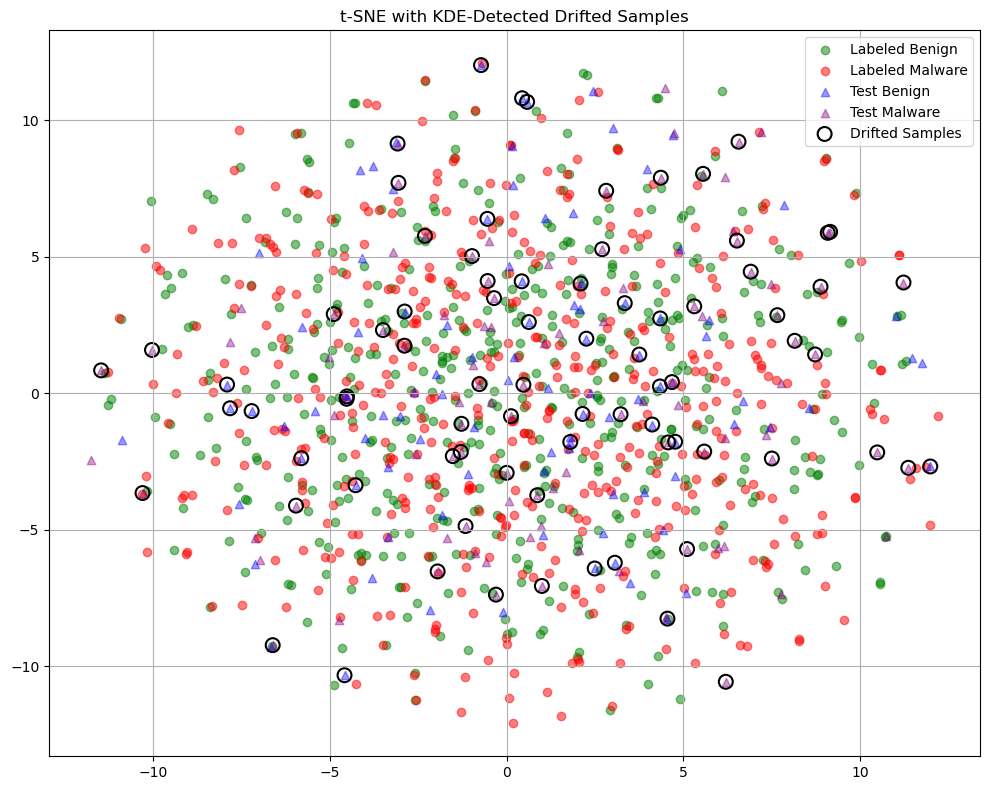

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.manifold import TSNE
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

# Example data (simulated)
# In practice, replace these with your encoded labeled and test tensors
X_labeled_enc = torch.randn(1000, 128)
y_labeled = torch.randint(0, 2, (1000,))
X_test_enc = torch.randn(200, 128)
y_test = torch.randint(0, 2, (200,))
logits_test = torch.randn(200, 2)

# Fit KDE for each class using labeled data
def fit_kde_per_class(X_enc, y, bandwidth=0.5):
    X_np = X_enc.cpu().numpy()
    y_np = y.cpu().numpy()
    kde_dict = {}
    for label in [0, 1]:
        kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
        kde.fit(X_np[y_np == label])
        kde_dict[label] = kde
    return kde_dict

# Score KDEs for test samples
def score_kde(kde_dict, X_test_enc):
    X_np = X_test_enc.cpu().numpy()
    log_prob_0 = kde_dict[0].score_samples(X_np)
    log_prob_1 = kde_dict[1].score_samples(X_np)
    return torch.tensor(log_prob_0), torch.tensor(log_prob_1)

# Detect drifted samples
def detect_drifted_samples(log_prob_0, log_prob_1, pred_labels, margin_thresh=1.0):
    diff = log_prob_1 - log_prob_0  # positive => class 1 region
    kde_preds = (diff > 0).long()
    margin = torch.abs(diff)
    drifted_mask = (kde_preds != pred_labels) & (margin > margin_thresh)
    return drifted_mask

# Fit KDE
kde_dict = fit_kde_per_class(X_labeled_enc, y_labeled)

# Score KDE log-likelihoods for test embeddings
log_p0, log_p1 = score_kde(kde_dict, X_test_enc)

# Predicted labels
probs_test = F.softmax(logits_test, dim=1)
pred_labels = probs_test.argmax(dim=1)

# Detect drifted samples
drifted_mask = detect_drifted_samples(log_p0, log_p1, pred_labels)

# Print number of drifted samples detected
drifted_indices = torch.nonzero(drifted_mask).squeeze()
print(f"Drifted samples detected: {len(drifted_indices)}")

# Visualize in 2D using t-SNE
X_all = torch.cat([X_labeled_enc, X_test_enc], dim=0).numpy()
X_2d = TSNE(n_components=2, perplexity=30).fit_transform(X_all)
X_lab_2d = X_2d[:len(X_labeled_enc)]
X_tst_2d = X_2d[len(X_labeled_enc):]

plt.figure(figsize=(10, 8))
plt.scatter(X_lab_2d[y_labeled == 0, 0], X_lab_2d[y_labeled == 0, 1], c='green', label='Labeled Benign', alpha=0.5)
plt.scatter(X_lab_2d[y_labeled == 1, 0], X_lab_2d[y_labeled == 1, 1], c='red', label='Labeled Malware', alpha=0.5)
plt.scatter(X_tst_2d[y_test == 0, 0], X_tst_2d[y_test == 0, 1], c='blue', label='Test Benign', alpha=0.4, marker='^')
plt.scatter(X_tst_2d[y_test == 1, 0], X_tst_2d[y_test == 1, 1], c='purple', label='Test Malware', alpha=0.4, marker='^')

# Highlight drifted
if len(drifted_indices) > 0:
    drift_2d = X_tst_2d[drifted_indices]
    plt.scatter(drift_2d[:, 0], drift_2d[:, 1], facecolors='none', edgecolors='black', linewidths=1.5, s=100, label='Drifted Samples')

plt.title("t-SNE with KDE-Detected Drifted Samples")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [2]:
path = "/home/mhaque3/myDir/data/gen_androzoo_drebin/2019-01to2019-12_selected.npz"
print("Loading Androzoo dataset...")
import numpy as np
data = np.load(path, allow_pickle=True)
data.files
X = data['X_train']
y = data['y_train']
y_bin = np.array([0 if label == 0 else 1 for label in y])
print(X.shape, y.shape)

Loading Androzoo dataset...
(45489, 16978) (45489,)


In [6]:
np.sum(y_bin==1)

4542

In [34]:
path = "/home/mhaque3/myDir/data/gen_apigraph_drebin/2012-01to2012-12_selected.npz"
print("Loading Androzoo dataset...")
import numpy as np
data = np.load(path, allow_pickle=True)
data.files
X = data['X_train']
y = data['y_train']
y_bin = np.array([0 if label == 0 else 1 for label in y])
print(X.shape, y.shape)

Loading Androzoo dataset...
(30533, 1159) (30533,)


/tmp/ipykernel_3691177/377057635.py:45: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(malware_outliers[:, 0], malware_outliers[:, 1], color='red', edgecolors='black', label='Malware Outliers', marker='x', s=100)
/tmp/ipykernel_3691177/377057635.py:46: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(benign_outliers[:, 0], benign_outliers[:, 1], color='blue', edgecolors='black', label='Benign Outliers', marker='x', s=100)


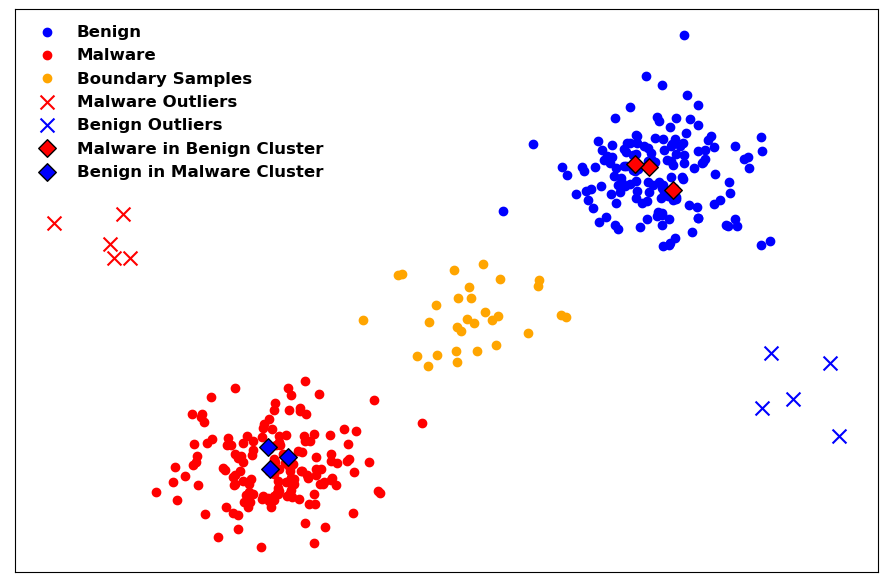

In [17]:
import matplotlib.pyplot as plt
import numpy as np
# Global font settings
plt.rcParams.update({
    "font.size": 44,
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 44,
    "legend.frameon": False
})
# Set random seed for reproducibility
np.random.seed(42)

# Generate benign cluster (centered at (2, 2))
benign = np.random.randn(150, 2) * 0.5 + np.array([2, 2])

# Generate malware cluster (centered at (-2, -2))
malware = np.random.randn(150, 2) * 0.5 + np.array([-2, -2])

# Generate boundary samples (clustered in between)
boundary = np.random.randn(30, 2) * 0.4 + np.array([0, 0])

# Malware outliers
malware_outliers = np.random.randn(5, 2) * 0.3 + np.array([-3.5, 1])

# Benign outliers
benign_outliers = np.random.randn(5, 2) * 0.3 + np.array([3.5, -1])

# Malware samples scattered in benign cluster
malware_in_benign = np.random.randn(3, 2) * 0.2 + np.array([2, 2])

# Benign samples scattered in malware cluster
benign_in_malware = np.random.randn(3, 2) * 0.2 + np.array([-2, -2])

# Plotting
plt.figure(figsize=(10, 7))

plt.scatter(benign[:, 0], benign[:, 1], color='blue', label='Benign')
plt.scatter(malware[:, 0], malware[:, 1], color='red', label='Malware')
plt.scatter(boundary[:, 0], boundary[:, 1], color='orange', label='Boundary Samples')
plt.scatter(malware_outliers[:, 0], malware_outliers[:, 1], color='red', edgecolors='black', label='Malware Outliers', marker='x', s=100)
plt.scatter(benign_outliers[:, 0], benign_outliers[:, 1], color='blue', edgecolors='black', label='Benign Outliers', marker='x', s=100)
plt.scatter(malware_in_benign[:, 0], malware_in_benign[:, 1], color='red', edgecolors='black', label='Malware in Benign Cluster', marker='D', s=80)
plt.scatter(benign_in_malware[:, 0], benign_in_malware[:, 1], color='blue', edgecolors='black', label='Benign in Malware Cluster', marker='D', s=80)

# plt.title('Visual Illustration of Malware and Benign Distributions with Drift and Outliers', fontsize=14)
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
plt.legend(loc='best', fontsize=12)
plt.grid(False)
# remove x and y ticks
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig("malware_benign_drift_motivation.png", dpi=300)
plt.show()